<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Model-and-Plot-Model-Performance" data-toc-modified-id="Load-Model-and-Plot-Model-Performance-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Model and Plot Model Performance</a></span><ul class="toc-item"><li><span><a href="#Average-Error" data-toc-modified-id="Average-Error-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Average Error</a></span></li></ul></li><li><span><a href="#Inference-Object" data-toc-modified-id="Inference-Object-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Inference Object</a></span></li><li><span><a href="#Effect-of-Reduced-Burning" data-toc-modified-id="Effect-of-Reduced-Burning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Effect of Reduced Burning</a></span><ul class="toc-item"><li><span><a href="#Effect-on-Seasonal-Pattern" data-toc-modified-id="Effect-on-Seasonal-Pattern-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Effect on Seasonal Pattern</a></span></li><li><span><a href="#Effect-On-Average-Pollution-Level-Dec-April" data-toc-modified-id="Effect-On-Average-Pollution-Level-Dec-April-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Effect On Average Pollution Level Dec-April</a></span></li><li><span><a href="#Effect-On-Average-Pollution-Level-March" data-toc-modified-id="Effect-On-Average-Pollution-Level-March-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Effect On Average Pollution Level March</a></span></li></ul></li><li><span><a href="#Animation" data-toc-modified-id="Animation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Animation</a></span></li><li><span><a href="#Additional-Plot" data-toc-modified-id="Additional-Plot-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Additional Plot</a></span></li></ul></div>

In [1]:
#  Load the "autoreload" extension so that code can change
%load_ext autoreload
%reload_ext autoreload
from pathlib import Path

#  always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline

import sys
sys.path.append('../')
from src.imports import *
from src.gen_functions import *
from src.features.dataset import Dataset
from src.visualization.vis_data import *
from src.visualization.vis_model import *
from src.models.predict_model import * 
# set font size 
plt.rcParams.update({'font.size': 16})

The data between 1st October 2017 and 15th June 2020 are set aside as a test dataset during the model optimization process. In this section, the prediction dataset is used for studying the effect of reduced burning activities, which is the major source of air pollution in Chiang Mai. The fitted model will be used to predict the pollution levels in a scenario where the burning activities decreased. 

The simulation is not the same as the prediction of the test data in the Plot Model Performance section, where the actual fire activities and the weather conditions were used to predict the pollution levels. In the simulation and in the actual situation, the fire and the weather information is not known, and one has to use the ranges of possible values from previous years to obtain a range of pollution levels in the prediction dataset. I call this method of statistical prediction.

# Load Model and Plot Model Performance

In [2]:
dataset, model, fire_cols, zone_list, feat_imp, roll_win = load_model(city='Chiang Mai', pollutant='PM2.5')

raw model performance {'test_r2_score': 0.7431, 'test_mean_squared_error': 274.499, 'test_mean_absolute_error': 10.4714, 'test_r2': 0.8573}
daily avg training error {'avg_trn_r2_score': 0.9452, 'avg_trn_mean_squared_error': 36.1641, 'avg_trn_mean_absolute_error': 3.7732, 'avg_trn_r2': 0.9731}
daily avg test error {'avg_test_r2_score': 0.7982, 'avg_test_mean_squared_error': 135.6166, 'avg_test_mean_absolute_error': 7.6241, 'avg_test_r2': 0.8951}


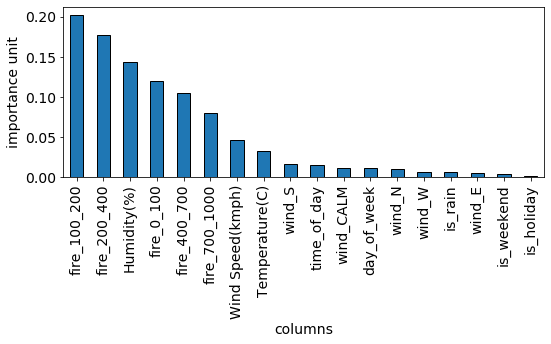

In [20]:
show_fea_imp(feat_imp,x_log=False, filename=None,title='')

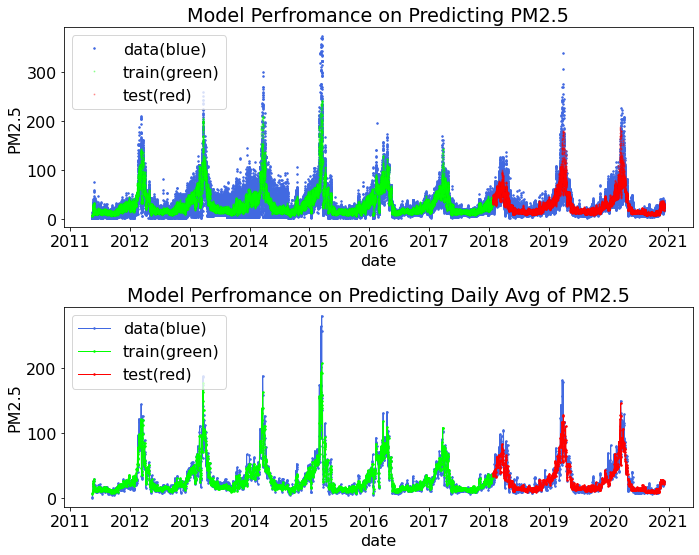

In [5]:
ytrn_pred_df, ytest_pred_df = plot_model_perf(dataset=dataset, model=model, split_list=[0.7, 0.3], xlim=[], to_save=True)

In [14]:
# calculate the average error for the training data
trn_error = cal_error(dataset, model, data_index=dataset.split_list[0])

# resample
ytrn_pred_df_avg = trn_error.resample('d').mean().dropna()
cal_scores(ytrn_pred_df_avg['actual'].values, ytrn_pred_df_avg['pred'].values, header_str='avg_trn_')

{'avg_trn_r2_score': 0.9452,
 'avg_trn_mean_squared_error': 36.1641,
 'avg_trn_mean_absolute_error': 3.7732,
 'avg_trn_r2': nan}

In [15]:
# calculate the average error for the test data
ytest_pred_df = cal_error(dataset, model, data_index=dataset.split_list[1])
# resample
ytest_pred_df_avg = ytest_pred_df.resample('d').mean().dropna()
cal_scores(ytest_pred_df_avg['actual'].values, ytest_pred_df_avg['pred'].values, header_str='avg_test_')

{'avg_test_r2_score': 0.7982,
 'avg_test_mean_squared_error': 135.6166,
 'avg_test_mean_absolute_error': 7.6241,
 'avg_test_r2': 0.8951}

## Average Error

Text(49.625, 0.5, 'residual(actual-predict)')

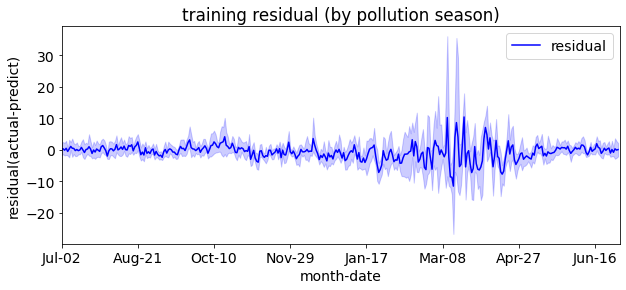

In [16]:
_, ax = plt.subplots(figsize=(10,4))
_ = plot_season_avg(trn_error, 'residual', ax, plot_error=True, roll=False, agg='mean')
ax.set_title('training residual (by pollution season)')
ax.set_ylabel('residual(actual-predict)')

Text(49.625, 0.5, 'residual(actual-predict)')

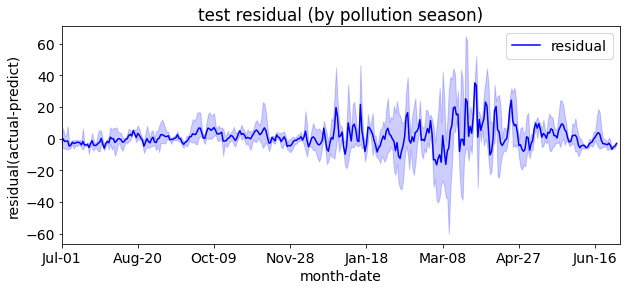

In [17]:
_, ax = plt.subplots(figsize=(10,4))
_ = plot_season_avg(ytest_pred_df, 'residual', ax, plot_error=True, roll=False, agg='mean')
ax.set_title('test residual (by pollution season)')
ax.set_ylabel('residual(actual-predict)')

In [18]:
ytrn_pred_df_avg.head()

actual       pred  residual      rmse
datetime                                            
2011-05-16   1.000000   7.679061 -6.679061  6.679061
2011-05-17   1.750000   7.047347 -5.297347  5.653313
2011-05-18  11.833333   9.642613  2.190720  4.331012
2011-05-19  13.250000  12.108498  1.141502  5.554619
2011-05-20  19.020833  19.553251 -0.532417  3.771801

In [26]:
ytest_pred_df_avg.tail()

actual       pred  residual      rmse
datetime                                            
2020-11-30  23.375000  23.614602 -0.239602  4.252827
2020-12-01  23.291667  24.802976 -1.511309  4.287345
2020-12-02  25.291667  26.823807 -1.532140  2.958325
2020-12-03  24.000000  25.050770 -1.050770  3.703973
2020-12-04  26.333333  21.938514  4.394819  5.986386

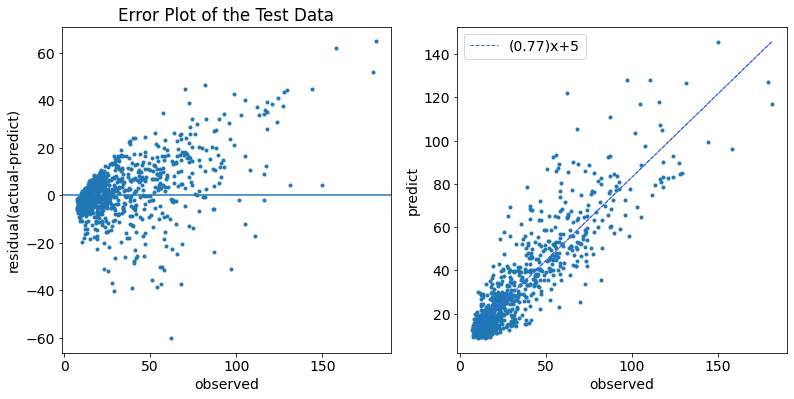

In [31]:
# plot residual vs actual value
_, ax = plt.subplots(1,2, figsize=(13, 6))

ax[0].scatter(ytest_pred_df_avg['actual'], ytest_pred_df_avg['residual'], marker='.')
ax[0].set_ylabel('residual(actual-predict)')
ax[0].set_xlabel('observed')
ax[0].axhline(0)
ax[0].set_title('Error Plot of the Test Data')

ax[1].scatter(ytest_pred_df_avg['actual'], ytest_pred_df_avg['pred'], marker='.')
ax[1].set_ylabel('predict')
ax[1].set_xlabel('observed')
#ax[1].set_title('Error Plot of the Test Data')
s = ytest_pred_df_avg['pred']
s.index = ytest_pred_df_avg['actual']
add_ln_trend_line(s, ax=ax[1])
ax[1].legend()
plt.savefig(dataset.report_folder + 'residual.png')

Text(0.5, 1.0, 'rmse (by pollution season)')

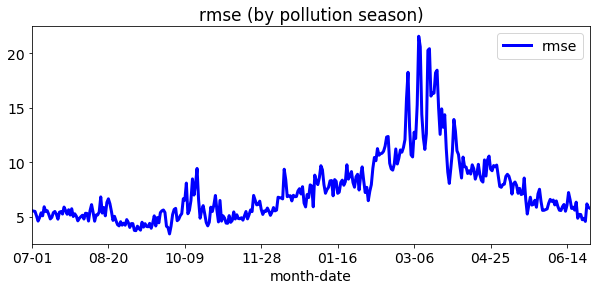

In [349]:
_, ax = plt.subplots(figsize=(10,4))
_ = plot_season_avg(trn_error, 'rmse', ax, plot_error=False, roll=True, agg='mean')
ax.set_title('rmse (by pollution season)')

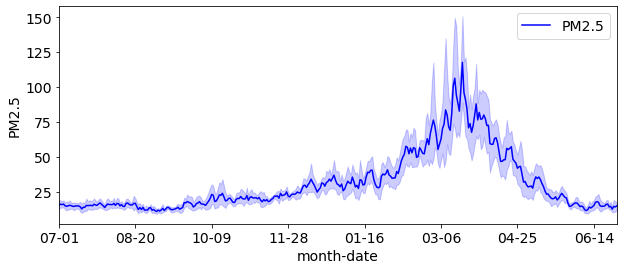

In [194]:
_, ax = plt.subplots(figsize=(10,4))
_ = plot_season_avg(data.data, 'PM2.5', ax, plot_error=True, roll=False, agg='mean')

# Inference Object

The statistical prediction is performed by obtaining a range of possible weather data, and fire activities from the training dataset. For a particular date of year and time of day in a test dataset, we sample from the data in the training dataset with similar date-time information. For example, the weather condition for 1st October 2017 at 10 am is obtained from data between 20th August and 10th October, between 9 and 11 am in previous years. The data must be from a similar time of day because the weather conditions are very different between day and night times. Moreover, since the data with recent years are likely to be similar to the data in the prediction dataset, the training dataset from the previous year is assigned twice more weight than the data in the year before. 

The range of possible independent variables was used to predict a range of possible hourly PM2.5 levels. The values from the same date-time are then averaged to produce final prediction values. Figure 13 compares the daily average of actual PM2.5(blue) and the statistical prediction(red). The statistical simulation is very similar to the values of the actual data. 

For convenience, `Inferer` object in `src.visualization.predict_model.py`is responsible sampling data from the history and perform simulation.  

In [4]:
# init Inferer
inferer = Inferer(city_name='Chiang Mai', pollutant='PM2.5')
# a dataset object if one of Inferer's attributes
dataset = inferer.dataset

raw model performance {'test_r2_score': 0.7431, 'test_mean_squared_error': 274.499, 'test_mean_absolute_error': 10.4714, 'test_r2': 0.8573}
daily avg training error {'avg_trn_r2_score': 0.9452, 'avg_trn_mean_squared_error': 36.1641, 'avg_trn_mean_absolute_error': 3.7732, 'avg_trn_r2': 0.9731}
daily avg test error {'avg_test_r2_score': 0.7982, 'avg_test_mean_squared_error': 135.6166, 'avg_test_mean_absolute_error': 7.6241, 'avg_test_r2': 0.8951}
max error 18.29850999981331


`inferer.get_data_sample_()` Create a range of possible values by sampling from the history, weighing more recent year twice more than earlier years.

In [9]:
%%time
inferer.get_data_sample_(n_samples=20, step=1, day_err=10, hour_err=2)

obtaining inference samples. This will take about 15 mins





  0%|                                                                                                                             | 0/25095 [00:00<?, ?it/s]


  0%|                                                                                                                   | 2/25095 [00:00<1:16:03,  5.50it/s]


  0%|                                                                                                                  | 4/25095 [00:20<21:43:43,  3.12s/it]


  0%|                                                                                                                  | 6/25095 [00:20<15:23:38,  2.21s/it]


  0%|                                                                                                                 | 10/25095 [00:20<10:52:29,  1.56s/it]


  0%|                                                                                                                  | 12/25095 [00:20<7:43:22,  1.11s/it]


  0%|                                      

  1%|█▋                                                                                                                 | 358/25095 [00:34<16:30, 24.97it/s]


  1%|█▋                                                                                                                 | 362/25095 [00:34<17:39, 23.34it/s]


  1%|█▋                                                                                                                 | 366/25095 [00:35<16:47, 24.53it/s]


  1%|█▋                                                                                                                 | 370/25095 [00:35<17:37, 23.39it/s]


  1%|█▋                                                                                                                 | 374/25095 [00:35<17:33, 23.46it/s]


  2%|█▋                                                                                                                 | 378/25095 [00:35<18:09, 22.68it/s]


  2%|█▊                                       

  3%|███▍                                                                                                               | 754/25095 [00:52<15:52, 25.56it/s]


  3%|███▍                                                                                                               | 758/25095 [00:52<15:18, 26.48it/s]


  3%|███▍                                                                                                               | 762/25095 [00:52<15:25, 26.29it/s]


  3%|███▌                                                                                                               | 766/25095 [00:52<15:30, 26.14it/s]


  3%|███▌                                                                                                               | 770/25095 [00:52<15:09, 26.74it/s]


  3%|███▌                                                                                                               | 774/25095 [00:52<15:03, 26.91it/s]


  3%|███▌                                     

  5%|█████▏                                                                                                            | 1142/25095 [01:07<16:08, 24.74it/s]


  5%|█████▏                                                                                                            | 1146/25095 [01:07<15:27, 25.83it/s]


  5%|█████▏                                                                                                            | 1150/25095 [01:07<16:41, 23.92it/s]


  5%|█████▏                                                                                                            | 1154/25095 [01:07<16:27, 24.24it/s]


  5%|█████▎                                                                                                            | 1158/25095 [01:08<16:17, 24.48it/s]


  5%|█████▎                                                                                                            | 1162/25095 [01:08<16:04, 24.82it/s]


  5%|█████▎                                   

  6%|██████▉                                                                                                           | 1530/25095 [01:22<14:15, 27.55it/s]


  6%|██████▉                                                                                                           | 1534/25095 [01:22<14:43, 26.67it/s]


  6%|██████▉                                                                                                           | 1538/25095 [01:22<14:19, 27.41it/s]


  6%|███████                                                                                                           | 1542/25095 [01:22<14:07, 27.78it/s]


  6%|███████                                                                                                           | 1546/25095 [01:22<14:17, 27.48it/s]


  6%|███████                                                                                                           | 1550/25095 [01:22<13:56, 28.16it/s]


  6%|███████                                  

  8%|████████▋                                                                                                         | 1918/25095 [01:35<15:03, 25.66it/s]


  8%|████████▋                                                                                                         | 1922/25095 [01:36<13:48, 27.96it/s]


  8%|████████▋                                                                                                         | 1926/25095 [01:36<14:28, 26.69it/s]


  8%|████████▊                                                                                                         | 1930/25095 [01:36<14:25, 26.78it/s]


  8%|████████▊                                                                                                         | 1934/25095 [01:36<14:12, 27.16it/s]


  8%|████████▊                                                                                                         | 1938/25095 [01:36<14:53, 25.92it/s]


  8%|████████▊                                

  9%|██████████▍                                                                                                       | 2302/25095 [01:50<14:26, 26.29it/s]


  9%|██████████▍                                                                                                       | 2306/25095 [01:50<14:14, 26.67it/s]


  9%|██████████▍                                                                                                       | 2310/25095 [01:50<13:57, 27.21it/s]


  9%|██████████▌                                                                                                       | 2314/25095 [01:50<14:02, 27.03it/s]


  9%|██████████▌                                                                                                       | 2318/25095 [01:50<13:38, 27.83it/s]


  9%|██████████▌                                                                                                       | 2322/25095 [01:50<13:21, 28.43it/s]


  9%|██████████▌                              

 11%|████████████▏                                                                                                     | 2686/25095 [02:04<15:13, 24.53it/s]


 11%|████████████▏                                                                                                     | 2690/25095 [02:04<14:46, 25.27it/s]


 11%|████████████▏                                                                                                     | 2694/25095 [02:04<14:05, 26.51it/s]


 11%|████████████▎                                                                                                     | 2698/25095 [02:05<13:50, 26.98it/s]


 11%|████████████▎                                                                                                     | 2702/25095 [02:05<13:52, 26.91it/s]


 11%|████████████▎                                                                                                     | 2706/25095 [02:05<13:47, 27.06it/s]


 11%|████████████▎                            

 12%|█████████████▉                                                                                                    | 3070/25095 [02:19<15:33, 23.58it/s]


 12%|█████████████▉                                                                                                    | 3074/25095 [02:19<14:34, 25.17it/s]


 12%|█████████████▉                                                                                                    | 3078/25095 [02:19<14:38, 25.07it/s]


 12%|██████████████                                                                                                    | 3082/25095 [02:20<14:15, 25.73it/s]


 12%|██████████████                                                                                                    | 3086/25095 [02:20<13:50, 26.51it/s]


 12%|██████████████                                                                                                    | 3090/25095 [02:20<14:16, 25.70it/s]


 12%|██████████████                           

 14%|███████████████▋                                                                                                  | 3454/25095 [02:34<15:16, 23.61it/s]


 14%|███████████████▋                                                                                                  | 3458/25095 [02:34<14:25, 25.00it/s]


 14%|███████████████▋                                                                                                  | 3462/25095 [02:35<14:01, 25.72it/s]


 14%|███████████████▋                                                                                                  | 3466/25095 [02:35<13:55, 25.88it/s]


 14%|███████████████▊                                                                                                  | 3470/25095 [02:35<13:37, 26.46it/s]


 14%|███████████████▊                                                                                                  | 3474/25095 [02:35<13:27, 26.79it/s]


 14%|███████████████▊                         

 15%|█████████████████▍                                                                                                | 3838/25095 [02:50<15:05, 23.48it/s]


 15%|█████████████████▍                                                                                                | 3842/25095 [02:50<14:27, 24.50it/s]


 15%|█████████████████▍                                                                                                | 3846/25095 [02:50<14:13, 24.90it/s]


 15%|█████████████████▍                                                                                                | 3850/25095 [02:50<13:54, 25.45it/s]


 15%|█████████████████▌                                                                                                | 3854/25095 [02:50<13:21, 26.50it/s]


 15%|█████████████████▌                                                                                                | 3858/25095 [02:50<13:05, 27.02it/s]


 15%|█████████████████▌                       

 17%|███████████████████▏                                                                                              | 4222/25095 [03:05<14:31, 23.96it/s]


 17%|███████████████████▏                                                                                              | 4226/25095 [03:05<14:08, 24.60it/s]


 17%|███████████████████▏                                                                                              | 4230/25095 [03:05<13:41, 25.40it/s]


 17%|███████████████████▏                                                                                              | 4234/25095 [03:05<13:31, 25.70it/s]


 17%|███████████████████▎                                                                                              | 4238/25095 [03:05<13:07, 26.48it/s]


 17%|███████████████████▎                                                                                              | 4242/25095 [03:05<12:58, 26.80it/s]


 17%|███████████████████▎                     

 18%|████████████████████▉                                                                                             | 4606/25095 [03:20<14:37, 23.34it/s]


 18%|████████████████████▉                                                                                             | 4610/25095 [03:20<14:43, 23.18it/s]


 18%|████████████████████▉                                                                                             | 4614/25095 [03:20<14:25, 23.66it/s]


 18%|████████████████████▉                                                                                             | 4618/25095 [03:21<14:04, 24.26it/s]


 18%|████████████████████▉                                                                                             | 4622/25095 [03:21<13:46, 24.76it/s]


 18%|█████████████████████                                                                                             | 4626/25095 [03:21<14:10, 24.06it/s]


 18%|█████████████████████                    

 20%|██████████████████████▋                                                                                           | 4990/25095 [03:35<12:37, 26.54it/s]


 20%|██████████████████████▋                                                                                           | 4994/25095 [03:35<12:33, 26.68it/s]


 20%|██████████████████████▋                                                                                           | 4998/25095 [03:35<12:31, 26.74it/s]


 20%|██████████████████████▋                                                                                           | 5002/25095 [03:36<12:40, 26.40it/s]


 20%|██████████████████████▋                                                                                           | 5006/25095 [03:36<12:49, 26.10it/s]


 20%|██████████████████████▊                                                                                           | 5010/25095 [03:36<12:49, 26.12it/s]


 20%|██████████████████████▊                  

 21%|████████████████████████▍                                                                                         | 5374/25095 [03:50<12:53, 25.51it/s]


 21%|████████████████████████▍                                                                                         | 5378/25095 [03:50<12:36, 26.07it/s]


 21%|████████████████████████▍                                                                                         | 5382/25095 [03:50<12:46, 25.71it/s]


 21%|████████████████████████▍                                                                                         | 5386/25095 [03:50<12:18, 26.67it/s]


 21%|████████████████████████▍                                                                                         | 5390/25095 [03:50<12:43, 25.82it/s]


 21%|████████████████████████▌                                                                                         | 5394/25095 [03:50<12:25, 26.42it/s]


 22%|████████████████████████▌                

 23%|██████████████████████████▏                                                                                       | 5758/25095 [04:05<13:03, 24.68it/s]


 23%|██████████████████████████▏                                                                                       | 5762/25095 [04:05<12:59, 24.79it/s]


 23%|██████████████████████████▏                                                                                       | 5766/25095 [04:05<12:28, 25.84it/s]


 23%|██████████████████████████▏                                                                                       | 5770/25095 [04:06<12:14, 26.30it/s]


 23%|██████████████████████████▏                                                                                       | 5774/25095 [04:06<12:23, 25.99it/s]


 23%|██████████████████████████▏                                                                                       | 5778/25095 [04:06<12:15, 26.27it/s]


 23%|██████████████████████████▎              

 24%|███████████████████████████▋                                                                                      | 6104/25095 [04:54<12:16, 25.78it/s]


 24%|███████████████████████████▋                                                                                      | 6108/25095 [04:54<11:56, 26.48it/s]


 24%|███████████████████████████▊                                                                                      | 6112/25095 [04:54<11:45, 26.90it/s]


 24%|███████████████████████████▊                                                                                      | 6116/25095 [04:54<11:33, 27.37it/s]


 24%|███████████████████████████▊                                                                                      | 6120/25095 [04:55<12:42, 24.88it/s]


 24%|███████████████████████████▊                                                                                      | 6124/25095 [04:55<12:19, 25.64it/s]


 24%|███████████████████████████▊             

 26%|█████████████████████████████▍                                                                                    | 6488/25095 [05:09<11:43, 26.46it/s]


 26%|█████████████████████████████▍                                                                                    | 6492/25095 [05:09<11:40, 26.58it/s]


 26%|█████████████████████████████▌                                                                                    | 6496/25095 [05:09<11:32, 26.85it/s]


 26%|█████████████████████████████▌                                                                                    | 6500/25095 [05:09<11:27, 27.05it/s]


 26%|█████████████████████████████▌                                                                                    | 6504/25095 [05:09<12:02, 25.72it/s]


 26%|█████████████████████████████▌                                                                                    | 6508/25095 [05:09<11:22, 27.22it/s]


 26%|█████████████████████████████▌           

 27%|███████████████████████████████▏                                                                                  | 6872/25095 [05:23<12:18, 24.67it/s]


 27%|███████████████████████████████▏                                                                                  | 6876/25095 [05:24<12:21, 24.58it/s]


 27%|███████████████████████████████▎                                                                                  | 6880/25095 [05:24<12:36, 24.09it/s]


 27%|███████████████████████████████▎                                                                                  | 6884/25095 [05:24<12:16, 24.71it/s]


 27%|███████████████████████████████▎                                                                                  | 6888/25095 [05:24<12:35, 24.09it/s]


 27%|███████████████████████████████▎                                                                                  | 6892/25095 [05:24<12:57, 23.42it/s]


 27%|███████████████████████████████▎         

 29%|████████████████████████████████▉                                                                                 | 7256/25095 [05:38<10:50, 27.42it/s]


 29%|████████████████████████████████▉                                                                                 | 7260/25095 [05:38<11:06, 26.77it/s]


 29%|████████████████████████████████▉                                                                                 | 7264/25095 [05:38<11:05, 26.81it/s]


 29%|█████████████████████████████████                                                                                 | 7268/25095 [05:38<10:52, 27.30it/s]


 29%|█████████████████████████████████                                                                                 | 7272/25095 [05:38<10:59, 27.01it/s]


 29%|█████████████████████████████████                                                                                 | 7276/25095 [05:39<11:12, 26.51it/s]


 29%|█████████████████████████████████        

 30%|██████████████████████████████████▋                                                                               | 7640/25095 [05:52<10:36, 27.44it/s]


 30%|██████████████████████████████████▋                                                                               | 7644/25095 [05:52<10:18, 28.21it/s]


 30%|██████████████████████████████████▋                                                                               | 7648/25095 [05:53<10:53, 26.70it/s]


 30%|██████████████████████████████████▊                                                                               | 7652/25095 [05:53<10:34, 27.48it/s]


 31%|██████████████████████████████████▊                                                                               | 7656/25095 [05:53<10:50, 26.79it/s]


 31%|██████████████████████████████████▊                                                                               | 7660/25095 [05:53<11:14, 25.85it/s]


 31%|██████████████████████████████████▊      

 32%|████████████████████████████████████▍                                                                             | 8024/25095 [06:07<11:01, 25.80it/s]


 32%|████████████████████████████████████▍                                                                             | 8028/25095 [06:07<11:08, 25.53it/s]


 32%|████████████████████████████████████▍                                                                             | 8032/25095 [06:07<10:54, 26.05it/s]


 32%|████████████████████████████████████▌                                                                             | 8036/25095 [06:07<10:52, 26.15it/s]


 32%|████████████████████████████████████▌                                                                             | 8040/25095 [06:07<10:38, 26.71it/s]


 32%|████████████████████████████████████▌                                                                             | 8044/25095 [06:07<10:19, 27.53it/s]


 32%|████████████████████████████████████▌    

 34%|██████████████████████████████████████▏                                                                           | 8408/25095 [06:21<10:13, 27.20it/s]


 34%|██████████████████████████████████████▏                                                                           | 8412/25095 [06:21<10:20, 26.88it/s]


 34%|██████████████████████████████████████▏                                                                           | 8416/25095 [06:21<10:20, 26.89it/s]


 34%|██████████████████████████████████████▏                                                                           | 8420/25095 [06:21<10:19, 26.90it/s]


 34%|██████████████████████████████████████▎                                                                           | 8424/25095 [06:21<10:24, 26.71it/s]


 34%|██████████████████████████████████████▎                                                                           | 8428/25095 [06:21<10:23, 26.71it/s]


 34%|██████████████████████████████████████▎  

 35%|███████████████████████████████████████▉                                                                          | 8792/25095 [06:35<09:28, 28.67it/s]


 35%|███████████████████████████████████████▉                                                                          | 8796/25095 [06:35<09:38, 28.18it/s]


 35%|███████████████████████████████████████▉                                                                          | 8800/25095 [06:35<09:34, 28.34it/s]


 35%|███████████████████████████████████████▉                                                                          | 8804/25095 [06:35<09:32, 28.43it/s]


 35%|████████████████████████████████████████                                                                          | 8808/25095 [06:35<09:29, 28.58it/s]


 35%|████████████████████████████████████████                                                                          | 8812/25095 [06:35<09:20, 29.07it/s]


 35%|████████████████████████████████████████ 

 37%|█████████████████████████████████████████▋                                                                        | 9176/25095 [06:48<09:28, 28.00it/s]


 37%|█████████████████████████████████████████▋                                                                        | 9180/25095 [06:48<09:18, 28.49it/s]


 37%|█████████████████████████████████████████▋                                                                        | 9184/25095 [06:48<09:09, 28.94it/s]


 37%|█████████████████████████████████████████▋                                                                        | 9188/25095 [06:48<09:25, 28.11it/s]


 37%|█████████████████████████████████████████▊                                                                        | 9192/25095 [06:49<09:14, 28.67it/s]


 37%|█████████████████████████████████████████▊                                                                        | 9196/25095 [06:49<09:14, 28.69it/s]


 37%|█████████████████████████████████████████

 38%|███████████████████████████████████████████▍                                                                      | 9560/25095 [07:01<08:30, 30.41it/s]


 38%|███████████████████████████████████████████▍                                                                      | 9564/25095 [07:01<08:57, 28.92it/s]


 38%|███████████████████████████████████████████▍                                                                      | 9568/25095 [07:02<08:56, 28.95it/s]


 38%|███████████████████████████████████████████▍                                                                      | 9572/25095 [07:02<08:52, 29.15it/s]


 38%|███████████████████████████████████████████▌                                                                      | 9576/25095 [07:02<08:47, 29.43it/s]


 38%|███████████████████████████████████████████▌                                                                      | 9580/25095 [07:02<08:40, 29.78it/s]


 38%|█████████████████████████████████████████

 40%|█████████████████████████████████████████████▏                                                                    | 9944/25095 [07:14<08:55, 28.29it/s]


 40%|█████████████████████████████████████████████▏                                                                    | 9948/25095 [07:15<09:13, 27.36it/s]


 40%|█████████████████████████████████████████████▏                                                                    | 9952/25095 [07:15<08:51, 28.49it/s]


 40%|█████████████████████████████████████████████▏                                                                    | 9956/25095 [07:15<09:01, 27.95it/s]


 40%|█████████████████████████████████████████████▏                                                                    | 9960/25095 [07:15<08:50, 28.54it/s]


 40%|█████████████████████████████████████████████▎                                                                    | 9964/25095 [07:15<08:29, 29.70it/s]


 40%|█████████████████████████████████████████

 41%|██████████████████████████████████████████████▌                                                                  | 10328/25095 [07:28<08:49, 27.90it/s]


 41%|██████████████████████████████████████████████▌                                                                  | 10332/25095 [07:28<08:37, 28.52it/s]


 41%|██████████████████████████████████████████████▌                                                                  | 10336/25095 [07:28<08:28, 29.04it/s]


 41%|██████████████████████████████████████████████▌                                                                  | 10340/25095 [07:28<08:14, 29.81it/s]


 41%|██████████████████████████████████████████████▌                                                                  | 10344/25095 [07:28<08:13, 29.88it/s]


 41%|██████████████████████████████████████████████▌                                                                  | 10348/25095 [07:29<08:29, 28.95it/s]


 41%|█████████████████████████████████████████

 43%|████████████████████████████████████████████████▏                                                                | 10712/25095 [07:41<08:13, 29.15it/s]


 43%|████████████████████████████████████████████████▎                                                                | 10716/25095 [07:41<08:01, 29.85it/s]


 43%|████████████████████████████████████████████████▎                                                                | 10720/25095 [07:41<08:03, 29.76it/s]


 43%|████████████████████████████████████████████████▎                                                                | 10724/25095 [07:41<08:24, 28.49it/s]


 43%|████████████████████████████████████████████████▎                                                                | 10728/25095 [07:42<08:18, 28.84it/s]


 43%|████████████████████████████████████████████████▎                                                                | 10732/25095 [07:42<08:15, 28.98it/s]


 43%|█████████████████████████████████████████

 44%|█████████████████████████████████████████████████▉                                                               | 11096/25095 [07:54<07:54, 29.50it/s]


 44%|█████████████████████████████████████████████████▉                                                               | 11100/25095 [07:55<08:13, 28.35it/s]


 44%|██████████████████████████████████████████████████                                                               | 11104/25095 [07:55<08:05, 28.84it/s]


 44%|██████████████████████████████████████████████████                                                               | 11108/25095 [07:55<07:58, 29.22it/s]


 44%|██████████████████████████████████████████████████                                                               | 11112/25095 [07:55<08:13, 28.35it/s]


 44%|██████████████████████████████████████████████████                                                               | 11116/25095 [07:55<08:12, 28.36it/s]


 44%|█████████████████████████████████████████

 46%|███████████████████████████████████████████████████▋                                                             | 11480/25095 [08:08<08:06, 27.97it/s]


 46%|███████████████████████████████████████████████████▋                                                             | 11484/25095 [08:08<07:55, 28.64it/s]


 46%|███████████████████████████████████████████████████▋                                                             | 11488/25095 [08:08<07:53, 28.73it/s]


 46%|███████████████████████████████████████████████████▋                                                             | 11492/25095 [08:08<08:01, 28.24it/s]


 46%|███████████████████████████████████████████████████▊                                                             | 11496/25095 [08:08<07:59, 28.36it/s]


 46%|███████████████████████████████████████████████████▊                                                             | 11500/25095 [08:09<07:56, 28.55it/s]


 46%|█████████████████████████████████████████

 47%|█████████████████████████████████████████████████████▍                                                           | 11864/25095 [08:22<08:07, 27.14it/s]


 47%|█████████████████████████████████████████████████████▍                                                           | 11868/25095 [08:22<07:58, 27.62it/s]


 47%|█████████████████████████████████████████████████████▍                                                           | 11872/25095 [08:22<07:59, 27.55it/s]


 47%|█████████████████████████████████████████████████████▍                                                           | 11876/25095 [08:22<07:46, 28.32it/s]


 47%|█████████████████████████████████████████████████████▍                                                           | 11880/25095 [08:22<07:54, 27.85it/s]


 47%|█████████████████████████████████████████████████████▌                                                           | 11884/25095 [08:23<07:49, 28.16it/s]


 47%|█████████████████████████████████████████

 49%|███████████████████████████████████████████████████████▏                                                         | 12248/25095 [08:36<07:42, 27.77it/s]


 49%|███████████████████████████████████████████████████████▏                                                         | 12252/25095 [08:36<07:35, 28.21it/s]


 49%|███████████████████████████████████████████████████████▏                                                         | 12256/25095 [08:36<08:23, 25.48it/s]


 49%|███████████████████████████████████████████████████████▏                                                         | 12260/25095 [08:36<08:02, 26.57it/s]


 49%|███████████████████████████████████████████████████████▏                                                         | 12264/25095 [08:36<08:04, 26.51it/s]


 49%|███████████████████████████████████████████████████████▏                                                         | 12268/25095 [08:36<07:48, 27.40it/s]


 49%|█████████████████████████████████████████

 50%|████████████████████████████████████████████████████████▉                                                        | 12632/25095 [08:50<07:34, 27.41it/s]


 50%|████████████████████████████████████████████████████████▉                                                        | 12636/25095 [08:50<07:41, 26.98it/s]


 50%|████████████████████████████████████████████████████████▉                                                        | 12640/25095 [08:50<07:24, 28.01it/s]


 50%|████████████████████████████████████████████████████████▉                                                        | 12644/25095 [08:50<07:21, 28.23it/s]


 50%|████████████████████████████████████████████████████████▉                                                        | 12648/25095 [08:50<07:24, 27.99it/s]


 50%|████████████████████████████████████████████████████████▉                                                        | 12652/25095 [08:50<07:19, 28.32it/s]


 50%|█████████████████████████████████████████

 52%|██████████████████████████████████████████████████████████▌                                                      | 13016/25095 [09:03<07:08, 28.16it/s]


 52%|██████████████████████████████████████████████████████████▋                                                      | 13020/25095 [09:04<07:32, 26.71it/s]


 52%|██████████████████████████████████████████████████████████▋                                                      | 13024/25095 [09:04<07:31, 26.75it/s]


 52%|██████████████████████████████████████████████████████████▋                                                      | 13028/25095 [09:04<07:19, 27.48it/s]


 52%|██████████████████████████████████████████████████████████▋                                                      | 13032/25095 [09:04<07:24, 27.13it/s]


 52%|██████████████████████████████████████████████████████████▋                                                      | 13036/25095 [09:04<07:16, 27.60it/s]


 52%|█████████████████████████████████████████

 53%|████████████████████████████████████████████████████████████▎                                                    | 13400/25095 [09:17<07:01, 27.77it/s]


 53%|████████████████████████████████████████████████████████████▎                                                    | 13404/25095 [09:17<07:02, 27.65it/s]


 53%|████████████████████████████████████████████████████████████▎                                                    | 13408/25095 [09:18<07:09, 27.24it/s]


 53%|████████████████████████████████████████████████████████████▍                                                    | 13412/25095 [09:18<07:01, 27.70it/s]


 53%|████████████████████████████████████████████████████████████▍                                                    | 13416/25095 [09:18<07:08, 27.23it/s]


 53%|████████████████████████████████████████████████████████████▍                                                    | 13420/25095 [09:18<06:59, 27.81it/s]


 53%|█████████████████████████████████████████

 55%|██████████████████████████████████████████████████████████████                                                   | 13784/25095 [09:31<06:36, 28.49it/s]


 55%|██████████████████████████████████████████████████████████████                                                   | 13788/25095 [09:31<06:49, 27.63it/s]


 55%|██████████████████████████████████████████████████████████████                                                   | 13792/25095 [09:31<06:40, 28.19it/s]


 55%|██████████████████████████████████████████████████████████████                                                   | 13796/25095 [09:32<07:00, 26.85it/s]


 55%|██████████████████████████████████████████████████████████████▏                                                  | 13800/25095 [09:32<06:50, 27.49it/s]


 55%|██████████████████████████████████████████████████████████████▏                                                  | 13804/25095 [09:32<06:47, 27.68it/s]


 55%|█████████████████████████████████████████

 56%|███████████████████████████████████████████████████████████████▊                                                 | 14168/25095 [09:45<06:33, 27.73it/s]


 56%|███████████████████████████████████████████████████████████████▊                                                 | 14172/25095 [09:45<06:35, 27.62it/s]


 56%|███████████████████████████████████████████████████████████████▊                                                 | 14176/25095 [09:45<06:28, 28.09it/s]


 57%|███████████████████████████████████████████████████████████████▊                                                 | 14180/25095 [09:46<06:50, 26.56it/s]


 57%|███████████████████████████████████████████████████████████████▊                                                 | 14184/25095 [09:46<06:49, 26.64it/s]


 57%|███████████████████████████████████████████████████████████████▉                                                 | 14188/25095 [09:46<06:37, 27.41it/s]


 57%|█████████████████████████████████████████

 58%|█████████████████████████████████████████████████████████████████▌                                               | 14552/25095 [09:59<06:24, 27.44it/s]


 58%|█████████████████████████████████████████████████████████████████▌                                               | 14556/25095 [09:59<06:31, 26.92it/s]


 58%|█████████████████████████████████████████████████████████████████▌                                               | 14560/25095 [09:59<06:21, 27.61it/s]


 58%|█████████████████████████████████████████████████████████████████▌                                               | 14564/25095 [09:59<06:21, 27.57it/s]


 58%|█████████████████████████████████████████████████████████████████▌                                               | 14568/25095 [10:00<06:25, 27.34it/s]


 58%|█████████████████████████████████████████████████████████████████▌                                               | 14572/25095 [10:00<06:29, 27.02it/s]


 58%|█████████████████████████████████████████

 60%|███████████████████████████████████████████████████████████████████▎                                             | 14936/25095 [10:13<06:01, 28.09it/s]


 60%|███████████████████████████████████████████████████████████████████▎                                             | 14940/25095 [10:13<05:57, 28.42it/s]


 60%|███████████████████████████████████████████████████████████████████▎                                             | 14944/25095 [10:13<06:04, 27.88it/s]


 60%|███████████████████████████████████████████████████████████████████▎                                             | 14948/25095 [10:14<06:08, 27.50it/s]


 60%|███████████████████████████████████████████████████████████████████▎                                             | 14952/25095 [10:14<06:12, 27.24it/s]


 60%|███████████████████████████████████████████████████████████████████▎                                             | 14956/25095 [10:14<06:01, 28.05it/s]


 60%|█████████████████████████████████████████

 61%|████████████████████████████████████████████████████████████████████▉                                            | 15320/25095 [10:27<05:46, 28.22it/s]


 61%|█████████████████████████████████████████████████████████████████████                                            | 15324/25095 [10:27<05:51, 27.79it/s]


 61%|█████████████████████████████████████████████████████████████████████                                            | 15328/25095 [10:27<05:47, 28.08it/s]


 61%|█████████████████████████████████████████████████████████████████████                                            | 15332/25095 [10:27<05:51, 27.79it/s]


 61%|█████████████████████████████████████████████████████████████████████                                            | 15336/25095 [10:28<05:54, 27.56it/s]


 61%|█████████████████████████████████████████████████████████████████████                                            | 15340/25095 [10:28<05:52, 27.71it/s]


 61%|█████████████████████████████████████████

 63%|██████████████████████████████████████████████████████████████████████▋                                          | 15704/25095 [10:41<05:36, 27.94it/s]


 63%|██████████████████████████████████████████████████████████████████████▋                                          | 15708/25095 [10:41<05:32, 28.20it/s]


 63%|██████████████████████████████████████████████████████████████████████▋                                          | 15712/25095 [10:41<05:29, 28.49it/s]


 63%|██████████████████████████████████████████████████████████████████████▊                                          | 15716/25095 [10:41<05:35, 27.97it/s]


 63%|██████████████████████████████████████████████████████████████████████▊                                          | 15720/25095 [10:42<05:40, 27.53it/s]


 63%|██████████████████████████████████████████████████████████████████████▊                                          | 15724/25095 [10:42<05:32, 28.15it/s]


 63%|█████████████████████████████████████████

 64%|████████████████████████████████████████████████████████████████████████▍                                        | 16088/25095 [10:55<05:17, 28.34it/s]


 64%|████████████████████████████████████████████████████████████████████████▍                                        | 16092/25095 [10:55<05:20, 28.12it/s]


 64%|████████████████████████████████████████████████████████████████████████▍                                        | 16096/25095 [10:55<05:17, 28.31it/s]


 64%|████████████████████████████████████████████████████████████████████████▍                                        | 16100/25095 [10:55<05:23, 27.79it/s]


 64%|████████████████████████████████████████████████████████████████████████▌                                        | 16104/25095 [10:56<05:27, 27.47it/s]


 64%|████████████████████████████████████████████████████████████████████████▌                                        | 16108/25095 [10:56<05:33, 26.93it/s]


 64%|█████████████████████████████████████████

 66%|██████████████████████████████████████████████████████████████████████████▏                                      | 16472/25095 [11:09<05:10, 27.78it/s]


 66%|██████████████████████████████████████████████████████████████████████████▏                                      | 16476/25095 [11:09<05:27, 26.35it/s]


 66%|██████████████████████████████████████████████████████████████████████████▏                                      | 16480/25095 [11:09<05:16, 27.20it/s]


 66%|██████████████████████████████████████████████████████████████████████████▏                                      | 16484/25095 [11:09<05:18, 27.05it/s]


 66%|██████████████████████████████████████████████████████████████████████████▏                                      | 16488/25095 [11:09<05:10, 27.70it/s]


 66%|██████████████████████████████████████████████████████████████████████████▎                                      | 16492/25095 [11:10<05:12, 27.50it/s]


 66%|█████████████████████████████████████████

 67%|███████████████████████████████████████████████████████████████████████████▉                                     | 16856/25095 [11:23<05:03, 27.18it/s]


 67%|███████████████████████████████████████████████████████████████████████████▉                                     | 16860/25095 [11:23<05:06, 26.88it/s]


 67%|███████████████████████████████████████████████████████████████████████████▉                                     | 16864/25095 [11:23<04:59, 27.50it/s]


 67%|███████████████████████████████████████████████████████████████████████████▉                                     | 16868/25095 [11:23<05:01, 27.25it/s]


 67%|███████████████████████████████████████████████████████████████████████████▉                                     | 16872/25095 [11:23<05:02, 27.15it/s]


 67%|███████████████████████████████████████████████████████████████████████████▉                                     | 16876/25095 [11:24<05:13, 26.24it/s]


 67%|█████████████████████████████████████████

 69%|█████████████████████████████████████████████████████████████████████████████▋                                   | 17240/25095 [11:37<04:38, 28.19it/s]


 69%|█████████████████████████████████████████████████████████████████████████████▋                                   | 17244/25095 [11:37<04:42, 27.83it/s]


 69%|█████████████████████████████████████████████████████████████████████████████▋                                   | 17248/25095 [11:37<04:44, 27.56it/s]


 69%|█████████████████████████████████████████████████████████████████████████████▋                                   | 17252/25095 [11:37<04:49, 27.06it/s]


 69%|█████████████████████████████████████████████████████████████████████████████▋                                   | 17256/25095 [11:38<04:53, 26.74it/s]


 69%|█████████████████████████████████████████████████████████████████████████████▋                                   | 17260/25095 [11:38<04:51, 26.86it/s]


 69%|█████████████████████████████████████████

 70%|███████████████████████████████████████████████████████████████████████████████▎                                 | 17624/25095 [11:51<04:26, 28.04it/s]


 70%|███████████████████████████████████████████████████████████████████████████████▍                                 | 17628/25095 [11:51<04:19, 28.77it/s]


 70%|███████████████████████████████████████████████████████████████████████████████▍                                 | 17632/25095 [11:51<04:22, 28.48it/s]


 70%|███████████████████████████████████████████████████████████████████████████████▍                                 | 17636/25095 [11:51<04:20, 28.60it/s]


 70%|███████████████████████████████████████████████████████████████████████████████▍                                 | 17640/25095 [11:52<04:35, 27.09it/s]


 70%|███████████████████████████████████████████████████████████████████████████████▍                                 | 17644/25095 [11:52<04:20, 28.59it/s]


 70%|█████████████████████████████████████████

 72%|█████████████████████████████████████████████████████████████████████████████████                                | 18008/25095 [12:04<04:12, 28.08it/s]


 72%|█████████████████████████████████████████████████████████████████████████████████                                | 18012/25095 [12:05<04:08, 28.54it/s]


 72%|█████████████████████████████████████████████████████████████████████████████████                                | 18016/25095 [12:05<04:14, 27.82it/s]


 72%|█████████████████████████████████████████████████████████████████████████████████▏                               | 18020/25095 [12:05<04:09, 28.35it/s]


 72%|█████████████████████████████████████████████████████████████████████████████████▏                               | 18024/25095 [12:05<04:06, 28.69it/s]


 72%|█████████████████████████████████████████████████████████████████████████████████▏                               | 18028/25095 [12:05<04:06, 28.71it/s]


 72%|█████████████████████████████████████████

 73%|██████████████████████████████████████████████████████████████████████████████████▊                              | 18392/25095 [12:18<03:45, 29.78it/s]


 73%|██████████████████████████████████████████████████████████████████████████████████▊                              | 18396/25095 [12:18<03:50, 29.04it/s]


 73%|██████████████████████████████████████████████████████████████████████████████████▊                              | 18400/25095 [12:18<03:49, 29.19it/s]


 73%|██████████████████████████████████████████████████████████████████████████████████▊                              | 18404/25095 [12:18<03:47, 29.35it/s]


 73%|██████████████████████████████████████████████████████████████████████████████████▉                              | 18408/25095 [12:18<03:45, 29.60it/s]


 73%|██████████████████████████████████████████████████████████████████████████████████▉                              | 18412/25095 [12:18<03:55, 28.43it/s]


 73%|█████████████████████████████████████████

 75%|████████████████████████████████████████████████████████████████████████████████████▌                            | 18776/25095 [12:31<03:36, 29.24it/s]


 75%|████████████████████████████████████████████████████████████████████████████████████▌                            | 18780/25095 [12:31<03:35, 29.25it/s]


 75%|████████████████████████████████████████████████████████████████████████████████████▌                            | 18784/25095 [12:31<03:47, 27.78it/s]


 75%|████████████████████████████████████████████████████████████████████████████████████▌                            | 18788/25095 [12:31<03:41, 28.50it/s]


 75%|████████████████████████████████████████████████████████████████████████████████████▌                            | 18792/25095 [12:32<03:46, 27.81it/s]


 75%|████████████████████████████████████████████████████████████████████████████████████▋                            | 18796/25095 [12:32<03:44, 28.09it/s]


 75%|█████████████████████████████████████████

 76%|██████████████████████████████████████████████████████████████████████████████████████▎                          | 19160/25095 [12:45<03:30, 28.14it/s]


 76%|██████████████████████████████████████████████████████████████████████████████████████▎                          | 19164/25095 [12:45<03:29, 28.33it/s]


 76%|██████████████████████████████████████████████████████████████████████████████████████▎                          | 19168/25095 [12:45<03:20, 29.55it/s]


 76%|██████████████████████████████████████████████████████████████████████████████████████▎                          | 19172/25095 [12:45<03:24, 28.91it/s]


 76%|██████████████████████████████████████████████████████████████████████████████████████▎                          | 19176/25095 [12:45<03:16, 30.12it/s]


 76%|██████████████████████████████████████████████████████████████████████████████████████▎                          | 19180/25095 [12:45<03:23, 29.01it/s]


 76%|█████████████████████████████████████████

 78%|████████████████████████████████████████████████████████████████████████████████████████                         | 19544/25095 [12:58<03:12, 28.83it/s]


 78%|████████████████████████████████████████████████████████████████████████████████████████                         | 19548/25095 [12:58<03:12, 28.81it/s]


 78%|████████████████████████████████████████████████████████████████████████████████████████                         | 19552/25095 [12:58<03:10, 29.07it/s]


 78%|████████████████████████████████████████████████████████████████████████████████████████                         | 19556/25095 [12:58<03:20, 27.63it/s]


 78%|████████████████████████████████████████████████████████████████████████████████████████                         | 19560/25095 [12:59<03:22, 27.29it/s]


 78%|████████████████████████████████████████████████████████████████████████████████████████                         | 19564/25095 [12:59<03:18, 27.88it/s]


 78%|█████████████████████████████████████████

 79%|█████████████████████████████████████████████████████████████████████████████████████████▋                       | 19928/25095 [13:11<02:56, 29.19it/s]


 79%|█████████████████████████████████████████████████████████████████████████████████████████▊                       | 19932/25095 [13:12<02:58, 28.89it/s]


 79%|█████████████████████████████████████████████████████████████████████████████████████████▊                       | 19936/25095 [13:12<03:03, 28.16it/s]


 79%|█████████████████████████████████████████████████████████████████████████████████████████▊                       | 19940/25095 [13:12<03:03, 28.14it/s]


 79%|█████████████████████████████████████████████████████████████████████████████████████████▊                       | 19944/25095 [13:12<03:01, 28.39it/s]


 79%|█████████████████████████████████████████████████████████████████████████████████████████▊                       | 19948/25095 [13:12<03:07, 27.38it/s]


 80%|█████████████████████████████████████████

 81%|███████████████████████████████████████████████████████████████████████████████████████████▍                     | 20312/25095 [13:25<02:49, 28.17it/s]


 81%|███████████████████████████████████████████████████████████████████████████████████████████▍                     | 20316/25095 [13:25<02:48, 28.34it/s]


 81%|███████████████████████████████████████████████████████████████████████████████████████████▍                     | 20320/25095 [13:25<02:57, 26.96it/s]


 81%|███████████████████████████████████████████████████████████████████████████████████████████▌                     | 20324/25095 [13:26<02:56, 26.98it/s]


 81%|███████████████████████████████████████████████████████████████████████████████████████████▌                     | 20328/25095 [13:26<02:58, 26.75it/s]


 81%|███████████████████████████████████████████████████████████████████████████████████████████▌                     | 20332/25095 [13:26<02:52, 27.58it/s]


 81%|█████████████████████████████████████████

 82%|█████████████████████████████████████████████████████████████████████████████████████████████▏                   | 20696/25095 [13:39<02:44, 26.69it/s]


 82%|█████████████████████████████████████████████████████████████████████████████████████████████▏                   | 20700/25095 [13:39<02:43, 26.81it/s]


 83%|█████████████████████████████████████████████████████████████████████████████████████████████▏                   | 20704/25095 [13:39<02:39, 27.50it/s]


 83%|█████████████████████████████████████████████████████████████████████████████████████████████▏                   | 20708/25095 [13:40<02:42, 26.97it/s]


 83%|█████████████████████████████████████████████████████████████████████████████████████████████▎                   | 20712/25095 [13:40<02:38, 27.63it/s]


 83%|█████████████████████████████████████████████████████████████████████████████████████████████▎                   | 20716/25095 [13:40<02:40, 27.28it/s]


 83%|█████████████████████████████████████████

 84%|██████████████████████████████████████████████████████████████████████████████████████████████▉                  | 21080/25095 [13:53<02:27, 27.17it/s]


 84%|██████████████████████████████████████████████████████████████████████████████████████████████▉                  | 21084/25095 [13:53<02:29, 26.74it/s]


 84%|██████████████████████████████████████████████████████████████████████████████████████████████▉                  | 21088/25095 [13:53<02:26, 27.36it/s]


 84%|██████████████████████████████████████████████████████████████████████████████████████████████▉                  | 21092/25095 [13:53<02:28, 26.97it/s]


 84%|██████████████████████████████████████████████████████████████████████████████████████████████▉                  | 21096/25095 [13:54<02:27, 27.16it/s]


 84%|███████████████████████████████████████████████████████████████████████████████████████████████                  | 21100/25095 [13:54<02:28, 26.95it/s]


 84%|█████████████████████████████████████████

 86%|████████████████████████████████████████████████████████████████████████████████████████████████▋                | 21464/25095 [14:07<02:11, 27.71it/s]


 86%|████████████████████████████████████████████████████████████████████████████████████████████████▋                | 21468/25095 [14:07<02:10, 27.89it/s]


 86%|████████████████████████████████████████████████████████████████████████████████████████████████▋                | 21472/25095 [14:07<02:11, 27.52it/s]


 86%|████████████████████████████████████████████████████████████████████████████████████████████████▋                | 21476/25095 [14:07<02:10, 27.76it/s]


 86%|████████████████████████████████████████████████████████████████████████████████████████████████▋                | 21480/25095 [14:08<02:12, 27.24it/s]


 86%|████████████████████████████████████████████████████████████████████████████████████████████████▋                | 21484/25095 [14:08<02:16, 26.52it/s]


 86%|█████████████████████████████████████████

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████▍              | 21848/25095 [14:21<01:58, 27.50it/s]


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████▍              | 21852/25095 [14:21<01:59, 27.05it/s]


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████▍              | 21856/25095 [14:21<01:56, 27.77it/s]


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████▍              | 21860/25095 [14:21<01:58, 27.36it/s]


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████▍              | 21864/25095 [14:21<01:59, 27.08it/s]


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████▍              | 21868/25095 [14:22<02:01, 26.66it/s]


 87%|█████████████████████████████████████████

 89%|████████████████████████████████████████████████████████████████████████████████████████████████████             | 22232/25095 [14:35<01:43, 27.79it/s]


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 22236/25095 [14:35<01:46, 26.94it/s]


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 22240/25095 [14:35<01:47, 26.67it/s]


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 22244/25095 [14:35<01:46, 26.84it/s]


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 22248/25095 [14:35<01:44, 27.37it/s]


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 22252/25095 [14:36<01:43, 27.39it/s]


 89%|█████████████████████████████████████████

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 22616/25095 [14:49<01:31, 27.03it/s]


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 22620/25095 [14:49<01:29, 27.74it/s]


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 22624/25095 [14:49<01:29, 27.72it/s]


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 22628/25095 [14:49<01:29, 27.42it/s]


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 22632/25095 [14:49<01:30, 27.11it/s]


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 22636/25095 [14:50<01:29, 27.38it/s]


 90%|█████████████████████████████████████████

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 23000/25095 [15:03<01:15, 27.76it/s]


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 23004/25095 [15:03<01:16, 27.26it/s]


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 23008/25095 [15:03<01:15, 27.50it/s]


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 23012/25095 [15:03<01:14, 28.08it/s]


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 23016/25095 [15:03<01:15, 27.66it/s]


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 23020/25095 [15:04<01:14, 27.85it/s]


 92%|█████████████████████████████████████████

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 23384/25095 [15:17<01:05, 26.14it/s]


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 23388/25095 [15:17<01:03, 26.69it/s]


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 23392/25095 [15:17<01:03, 26.87it/s]


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 23396/25095 [15:18<01:03, 26.78it/s]


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 23400/25095 [15:18<01:03, 26.74it/s]


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 23404/25095 [15:18<01:03, 26.59it/s]


 93%|█████████████████████████████████████████

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████      | 23768/25095 [15:31<00:48, 27.39it/s]


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████      | 23772/25095 [15:32<00:47, 27.67it/s]


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████      | 23776/25095 [15:32<00:48, 27.37it/s]


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████      | 23780/25095 [15:32<00:48, 26.96it/s]


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████      | 23784/25095 [15:32<00:47, 27.32it/s]


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████      | 23788/25095 [15:32<00:47, 27.56it/s]


 95%|█████████████████████████████████████████

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 24152/25095 [15:46<00:35, 26.42it/s]


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 24156/25095 [15:46<00:35, 26.59it/s]


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 24160/25095 [15:46<00:34, 27.19it/s]


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 24164/25095 [15:46<00:34, 27.06it/s]


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 24168/25095 [15:46<00:34, 26.84it/s]


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 24172/25095 [15:46<00:33, 27.49it/s]


 96%|█████████████████████████████████████████

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 24536/25095 [16:01<00:21, 25.63it/s]


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 24540/25095 [16:01<00:21, 25.53it/s]


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 24544/25095 [16:01<00:21, 25.91it/s]


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 24548/25095 [16:01<00:21, 25.16it/s]


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 24552/25095 [16:01<00:21, 25.45it/s]


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 24556/25095 [16:01<00:20, 26.07it/s]


 98%|█████████████████████████████████████████

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 24920/25095 [16:15<00:06, 26.99it/s]


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 24924/25095 [16:16<00:06, 27.49it/s]


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 24928/25095 [16:16<00:06, 27.20it/s]


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 24932/25095 [16:16<00:05, 27.48it/s]


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 24936/25095 [16:16<00:05, 27.02it/s]


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 24940/25095 [16:16<00:05, 27.74it/s]


 99%|█████████████████████████████████████████

datasample columns Index(['Humidity(%)', 'Humidity(%)_lag_1', 'Humidity(%)_lag_10',
       'Humidity(%)_lag_11', 'Humidity(%)_lag_12', 'Humidity(%)_lag_13',
       'Humidity(%)_lag_14', 'Humidity(%)_lag_15', 'Humidity(%)_lag_16',
       'Humidity(%)_lag_17',
       ...
       'fire_0_100_lag_41', 'fire_100_200_lag_41', 'fire_200_400_lag_41',
       'fire_400_700_lag_41', 'fire_700_900_lag_41', 'fire_0_100_lag_42',
       'fire_100_200_lag_42', 'fire_200_400_lag_42', 'fire_400_700_lag_42',
       'fire_700_900_lag_42'],
      dtype='object', length=560)
adding lag
date data column Index(['is_holiday', 'is_weekend', 'day_of_week', 'time_of_day',
       'is_holiday_lag_1', 'is_weekend_lag_1', 'day_of_week_lag_1',
       'time_of_day_lag_1', 'is_holiday_lag_2', 'is_weekend_lag_2',
       ...
       'day_of_week_lag_40', 'time_of_day_lag_40', 'is_holiday_lag_41',
       'is_weekend_lag_41', 'day_of_week_lag_41', 'time_of_day_lag_41',
       'is_holiday_lag_42', 'is_weekend_lag_42', 'day_of_

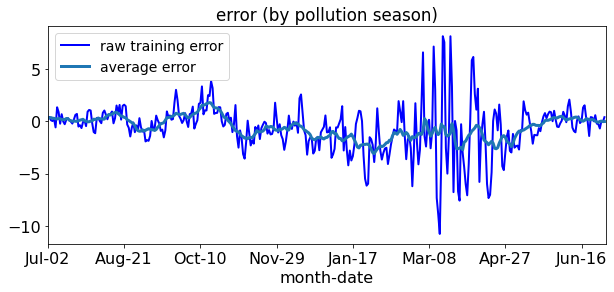

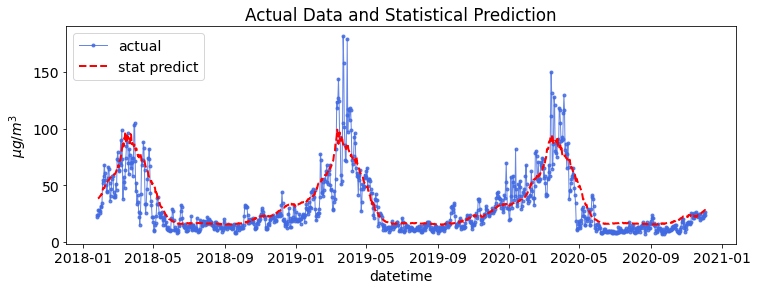

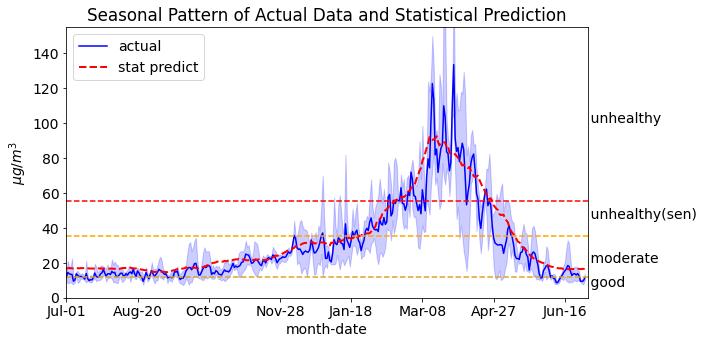

In [98]:
inferer.compare_inf_act()

In [105]:
sea_pred = _reduct_effect_q(inferer.model, inferer.data_samples, ['fire_0_100', 'fire_100_200', 'fire_200_400', 'fire_400_700'], inferer.sea_error, q=0.75, per_cut=0.5)

In [32]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


# Effect of Reduced Burning

In the figure below, (top) seasonal pattern of the pollution level when the burning activities are reduced to 100%, 90%, 50%, and 10% in 0 – 700 km radius. 100% means no fire reduction. (bottom) corresponding numbers of hotspots per day in different scenarios. The values above the red line is in the unhealthy range.

## Effect on Seasonal Pattern

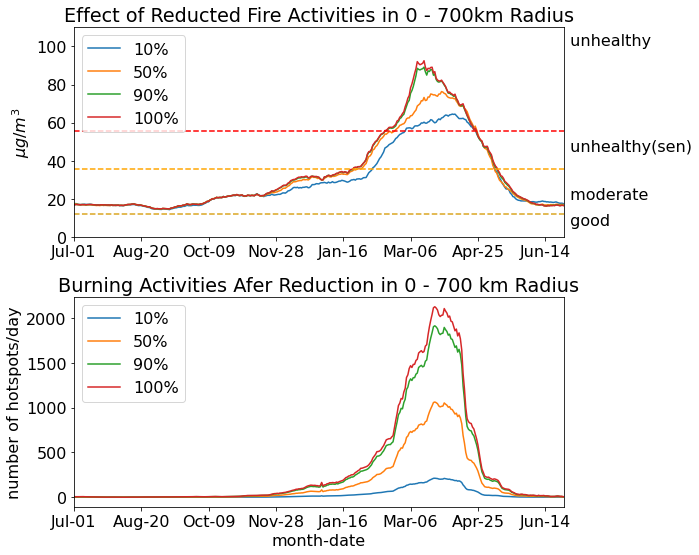

In [83]:
data = inferer.dataset
fire_hour = data.fire[data.fire['distance'] <= 700].copy()
fire_hour = fire_hour[['count']].resample('d').sum()
col = ['number of hotspots']
fire_hour.columns = col
fire_hour = fire_hour.rolling(5, min_periods=0).agg('mean').copy().dropna()
sep_fire, winter_day_dict = season_avg(fire_hour, cols= col, roll=False, agg='mean', offset=182) 
sep_fire = sep_fire.groupby('winter_day').mean()[col]
red_list = [0.9, 0.5, 0.1, 0]
red_fire = []
#colors = ['#1f77b4', '#2ca02c', '#9467bd', '#7f7f7f']
for per_cut in red_list:
    temp = sep_fire*(1-per_cut)
    temp.columns = [int(round(1-per_cut,2)*100)]
    red_fire.append(temp)
    
red_fire = pd.concat(red_fire, axis=1)

_, a = plt.subplots(2,1, figsize=(10,8),sharex=True)

ax = a[1]
red_fire.plot(ax=ax)
legends = [ str(s) + '%' for s in red_fire.columns]
ax.legend(legends, loc='upper left')
ax.set_title('Burning Activities Afer Reduction in 0 - 700 km Radius')
ax.set_xlim([red_fire.index.min(), red_fire.index.max()])
new_ticks = ['Jul-01', 'Aug-20', 'Oct-09', 'Nov-28', 'Jan-16', 'Mar-06', 'Apr-25', 'Jun-14', '']    
ax.set_xticklabels(new_ticks)
ax.set_xlabel('month-date')
ax.set_ylabel('number of hotspots/day')

fea_effect = inferer.features_effect_season(features=['fire_0_100', 'fire_100_200', 'fire_200_400', 'fire_400_700'], q=0.75, ax=a[0],red_list=[0.9, 0.5, 0.1, 0])
a[0].set_title('Effect of Reducted Fire Activities in 0 - 700km Radius')
a[0].xaxis.set_tick_params(which='both', labelbottom=True)
a[0].set_xticklabels(new_ticks)
a[0].set_xlabel('month-date')
legends = [ str(s) + '%' for s in red_fire.columns]
a[0].legend(legends, loc='upper left')


plt.tight_layout()

plt.savefig(inferer.report_folder + 'effect_fire_0_700km_sea.png')


In the figure below, (top) seasonal pattern of the pollution level when the burning activities are reduced to 100%, 90%, 50%, and 10% in 0 – 100 km radius. 100% means no fire reduction. (bottom) corresponding numbers of hotspots per day in different scenarios. The values above the red line is in the unhealthy range.

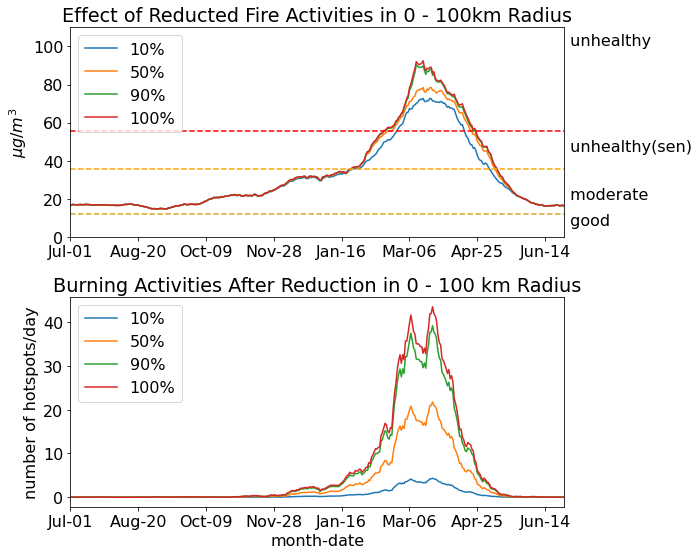

In [82]:
data = inferer.dataset
fire_hour = data.fire[data.fire['distance'] <= 100].copy()
fire_hour = fire_hour[['count']].resample('d').sum()
col = ['number of hotspots']
fire_hour.columns = col
fire_hour = fire_hour.rolling(5, min_periods=0).agg('mean').copy().dropna()
sep_fire, winter_day_dict = season_avg(fire_hour, cols= col, roll=False, agg='mean', offset=182) 
sep_fire = sep_fire.groupby('winter_day').mean()[col]
red_list = [0.9, 0.5, 0.1, 0]
red_fire = []
#colors = ['#1f77b4', '#2ca02c', '#9467bd', '#7f7f7f']
for per_cut in red_list:
    temp = sep_fire*(1-per_cut)
    temp.columns = [int(round(1-per_cut,2)*100)]
    red_fire.append(temp)
    
plot_data_list = []    
red_fire = pd.concat(red_fire, axis=1)
plot_data_list.append(red_fire)

_, a = plt.subplots(2,1, figsize=(10,8),sharex=True)

ax = a[1]
red_fire.plot(ax=ax)
legends = [ str(s) + '%' for s in red_fire.columns]
ax.legend(legends, loc='upper left')
ax.set_title('Burning Activities After Reduction in 0 - 100 km Radius')
ax.set_xlim([red_fire.index.min(), red_fire.index.max()])
new_ticks = ['Jul-01', 'Aug-20', 'Oct-09', 'Nov-28', 'Jan-16', 'Mar-06', 'Apr-25', 'Jun-14', '']    
ax.set_xticklabels(new_ticks)
ax.set_xlabel('month-date')
ax.set_ylabel('number of hotspots/day')

fea_effect = inferer.features_effect_season(features=['fire_0_100'], q=0.75, ax=a[0],red_list=[0.9, 0.5, 0.1, 0])
plot_data_list.append(fea_effect)
a[0].set_title('Effect of Reducted Fire Activities in 0 - 100km Radius')
a[0].xaxis.set_tick_params(which='both', labelbottom=True)
a[0].set_xticklabels(new_ticks)
a[0].set_xlabel('month-date')
plt.tight_layout()
legends = [ str(s) + '%' for s in red_fire.columns]
a[0].legend(legends, loc='upper left')

plt.savefig(inferer.report_folder + 'effect_fire_0_100km_sea.png')

# explore raw plot
h_filename = rawplot_folder +'effect_fire_0_100km_sea'
for i, df in enumerate(plot_data_list):
    df.to_csv(h_filename + f'{i}.csv', index=False)


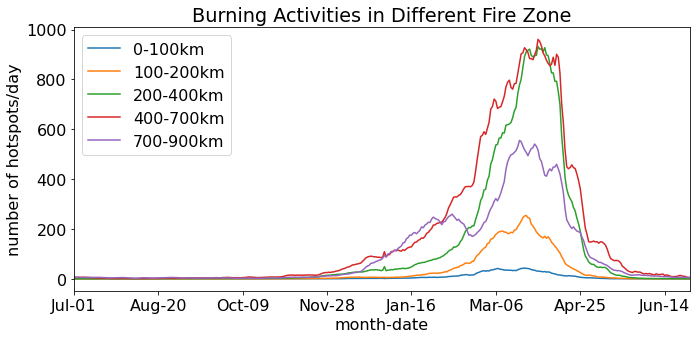

In [84]:
# Plot number of hotspot/day in different fire zone
inner = 0
num_fire_df = []
for distance in inferer.zone_list[1:]: 
    fire_hour = dataset.fire[(dataset.fire['distance']>inner )&(dataset.fire['distance'] <= distance)].copy()
    fire_hour = fire_hour[['count']].resample('d').sum()
    col = [f'{inner}-{distance}km']
    inner = distance
    fire_hour.columns = col 
    fire_hour = fire_hour.rolling(5, min_periods=0).agg('mean').copy().dropna()
    sea_fire, winter_day_dict = season_avg(fire_hour, cols= col, roll=False, agg='mean', offset=182) 
    sea_fire = sea_fire.groupby('winter_day').mean()[col]
    num_fire_df.append(sea_fire)
    
num_fire_df = pd.concat(num_fire_df, axis=1)

_, ax = plt.subplots(1,1, figsize=(10,5),sharex=True)
ax.plot(num_fire_df)
ax.legend(num_fire_df.columns, loc='upper left')
ax.set_title('Burning Activities in Different Fire Zone')
ax.set_xlim([num_fire_df.index.min(), num_fire_df.index.max()])
new_ticks = ['07-01', '08-20', '10-09', '11-28', '01-16', '03-06', '04-25', '06-14', '']  
new_ticks = ['Jul-01', 'Aug-20', 'Oct-09', 'Nov-28', 'Jan-16', 'Mar-06', 'Apr-25', 'Jun-14', '']    

ax.set_xticklabels(new_ticks)
ax.set_xlabel('month-date')
ax.set_ylabel('number of hotspots/day')
plt.tight_layout()

plt.savefig(inferer.report_folder + 'num_fires_sea.png')

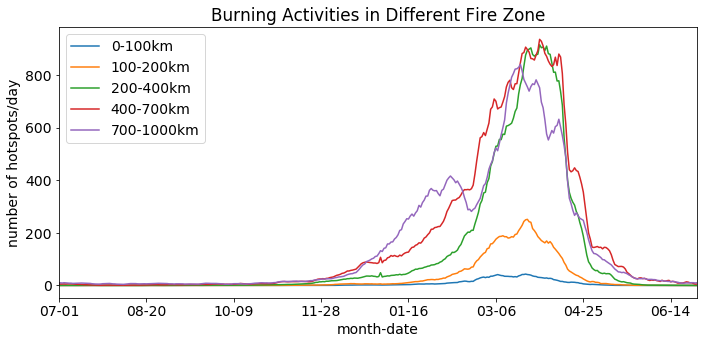

In [38]:
# Plot number of hotspot/day in different fire zone
inner = 0
num_fire_df = []
for distance in inferer.zone_list[1:]: 
    fire_hour = dataset.fire[(dataset.fire['distance']>inner )&(dataset.fire['distance'] <= distance)].copy()
    fire_hour = fire_hour[['count']].resample('d').sum()
    col = [f'{inner}-{distance}km']
    inner = distance
    fire_hour.columns = col 
    fire_hour = fire_hour.rolling(5, min_periods=0).agg('mean').copy().dropna()
    sea_fire, winter_day_dict = season_avg(fire_hour, cols= col, roll=False, agg='mean', offset=182) 
    sea_fire = sea_fire.groupby('winter_day').mean()[col]
    num_fire_df.append(sea_fire)
    
num_fire_df = pd.concat(num_fire_df, axis=1)

_, ax = plt.subplots(1,1, figsize=(10,5),sharex=True)
ax.plot(num_fire_df)
ax.legend(num_fire_df.columns, loc='upper left')
ax.set_title('Burning Activities in Different Fire Zone')
ax.set_xlim([num_fire_df.index.min(), num_fire_df.index.max()])
new_ticks = ['07-01', '08-20', '10-09', '11-28', '01-16', '03-06', '04-25', '06-14', '']  
new_ticks = ['Jul-01', 'Aug-20', 'Oct-09', 'Nov-28', 'Jan-16', 'Mar-06', 'Apr-25', 'Jun-14', '']    

ax.set_xticklabels(new_ticks)
ax.set_xlabel('month-date')
ax.set_ylabel('number of hotspots/day')
plt.tight_layout()

plt.savefig(inferer.report_folder + 'num_fires_sea.png')


## Effect On Average Pollution Level Dec-April

There will be different variation of the same plots

In [70]:
%%time

features = inferer.feat_imp['index'][inferer.feat_imp['index'].str.contains('fire')][:5]
zone_list = inferer.zone_list
feature_list = []
columns_list = []
for i in range(1,6):
    fea = features[:i]
    feature_list.append(fea)
    columns_list.append(f'fire {zone_list[0]}-{zone_list[i]}km')
    
rawplot_folder = '../reports/raw_plot/'
fea_effect_3m = inferer.features_effect_sum(feature_list, q=0.75, red_list=[0, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.98, 0.99, 0.999, 0.9999], time_range=[185,305],agg='mean', raw_filename= rawplot_folder +'effect_of_fire_reduction_3m' )
fea_effect_3m.columns = columns_list
# change from percent to whole number
fea_effect_3m.index *= 100
fea_effect_3m.index = fea_effect_3m.index.astype(int)
# save the raw plot for animation 
fea_effect_3m.to_csv(dataset.model_folder +'effect_of_fire_reduction_3m.csv', index=True)


Wall time: 4min 21s


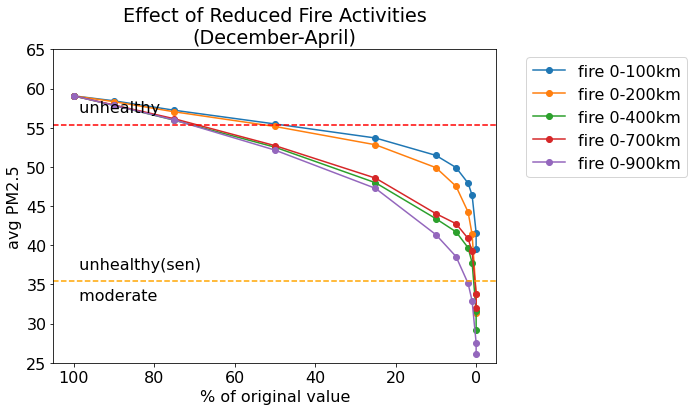

In [78]:
plt.figure(figsize=(10,6))
plt.title("Effect of Reduced Fire Activities\n(December-April)")
columns_list = [fill(l,25) for l in fea_effect_3m.columns]
plt.plot(fea_effect_3m, marker='o')
plt.legend(columns_list, bbox_to_anchor=(1.05, 1))
plt.xlim(105, -5) 
plt.xlabel('% of original value')
plt.ylabel('avg PM2.5')
plt.ylim([25, 65])

for l, c in inferer.color_zip:
    plt.axhline(l, color=c, linestyle='dashed')
    
plt.text(100, 33, ' moderate',  horizontalalignment='left')
plt.text(100, 37, ' unhealthy(sen)',  horizontalalignment='left')
plt.text(100, 57, ' unhealthy',  horizontalalignment='left')

plt.tight_layout()
plt.savefig(inferer.report_folder + 'effect_of_fire_reduction_3m_v2.png')


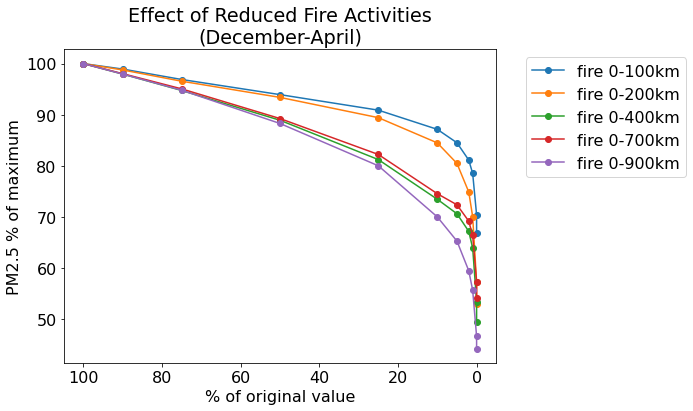

In [86]:
plt.figure(figsize=(10,6))
plt.title("Effect of Reduced Fire Activities\n(December-April)")
columns_list = [fill(l,25) for l in fea_effect_3m.columns]
temp = fea_effect_3m*100/fea_effect_3m.max()
plt.plot(temp, marker='o')
plt.legend(columns_list, bbox_to_anchor=(1.05, 1))
plt.xlim(105, -5) 
plt.xlabel('% of original value')
plt.ylabel('PM2.5 % of maximum')

plt.tight_layout()

I am interested in percent reduction. Average value between Dec-Mar will be use for normalization.

In [95]:
print(fea_effect_3m.max().max())

59.06581613398653


In [92]:
fea_effect_3m*100/fea_effect_3m.max()

fire 0-100km  fire 0-200km  fire 0-400km  fire 0-700km  fire 0-900km
100    100.000000    100.000000    100.000000    100.000000    100.000000
90      98.932252     98.755397     97.950124     98.031786     97.950858
75      96.890415     96.554615     94.743477     95.057445     94.794815
50      93.933076     93.390479     88.919348     89.252619     88.288808
25      90.895183     89.430506     81.230215     82.229381     80.014563
10      87.143442     84.495340     73.466406     74.553504     70.020576
5       84.517618     80.478295     70.629279     72.381442     65.285344
2       81.135982     74.898319     67.189655     69.187477     59.489598
1       78.523524     70.056952     63.934971     66.382592     55.682134
0       70.409968     57.260786     53.435360     57.268417     46.654283
0       66.910174     53.064279     49.409517     54.062508     44.259715

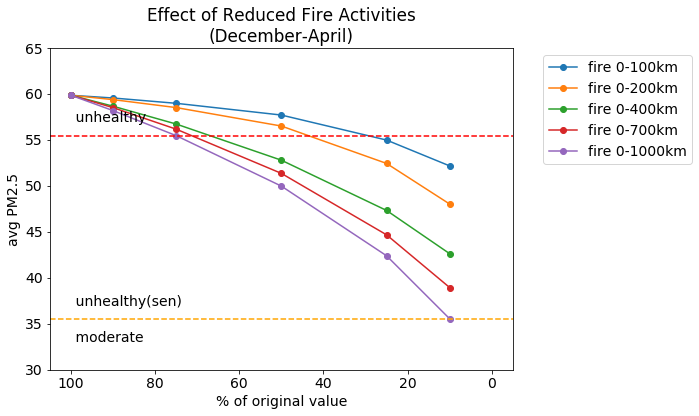

In [86]:
plt.figure(figsize=(10,6))
plt.title("Effect of Reduced Fire Activities\n(December-April)")
columns_list = [fill(l,25) for l in fea_effect_3m.columns]
plt.plot(fea_effect_3m, marker='o')
plt.legend(columns_list, bbox_to_anchor=(1.05, 1))
plt.xlim(105, -5) 
plt.xlabel('% of original value')
plt.ylabel('avg PM2.5')
plt.ylim([30, 65])

for l, c in inferer.color_zip:
    plt.axhline(l, color=c, linestyle='dashed')
    
plt.text(100, 33, ' moderate',  horizontalalignment='left')
plt.text(100, 37, ' unhealthy(sen)',  horizontalalignment='left')
plt.text(100, 57, ' unhealthy',  horizontalalignment='left')

plt.tight_layout()
plt.savefig(inferer.report_folder + 'effect_of_fire_reduction_3m.png')


## Effect On Average Pollution Level March

There will be different variation of the same plot

In [72]:
%%time

features = inferer.feat_imp['index'][inferer.feat_imp['index'].str.contains('fire')][:5]
zone_list = inferer.zone_list
feature_list = []
columns_list = []
for i in range(1,6):
    fea = features[:i]
    feature_list.append(fea)
    columns_list.append(f'fire {zone_list[0]}-{zone_list[i]}km')
    
fea_effect_mar = inferer.features_effect_sum(feature_list, q=0.75, red_list=[0, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.98, 0.99, 0.999, 0.9999], time_range=[245,275],agg='mean', raw_filename= rawplot_folder +'effect_of_fire_reduction_mar' )
# change from percent to whole number
fea_effect_mar.index *= 100
fea_effect_mar.index = fea_effect_mar.index.astype(int)
fea_effect_mar.to_csv(dataset.model_folder +'effect_of_fire_reduction_mar.csv', index=True)


Wall time: 4min 25s


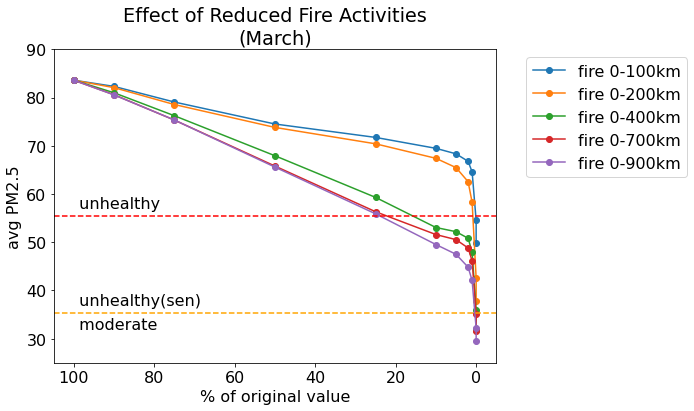

In [79]:
plt.figure(figsize=(10,6))
plt.title("Effect of Reduced Fire Activities\n(March)")
columns_list = [fill(l,20) for l in fea_effect_3m.columns]
plt.plot(fea_effect_mar, marker='o')
plt.legend(columns_list, bbox_to_anchor=(1.05, 1))
plt.xlim(105, -5) 
plt.xlabel('% of original value')
plt.ylabel('avg PM2.5')
plt.ylim([25, 90])

for l, c in inferer.color_zip: 
    plt.axhline(l, color=c, linestyle='dashed')
    
plt.text(100, 32, ' moderate',  horizontalalignment='left')
plt.text(100, 37, ' unhealthy(sen)',  horizontalalignment='left')
plt.text(100, 57, ' unhealthy',  horizontalalignment='left')
plt.tight_layout()
plt.savefig(inferer.report_folder + 'effect_of_fire_reduction_mar_v2.png')

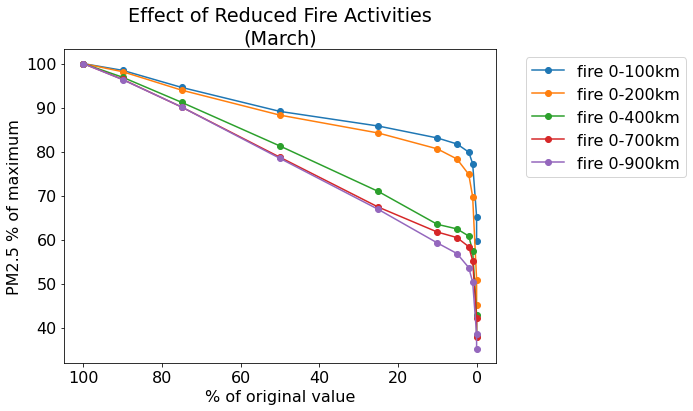

In [90]:
plt.figure(figsize=(10,6))
plt.title("Effect of Reduced Fire Activities\n(March)")
columns_list = [fill(l,25) for l in fea_effect_3m.columns]
temp = fea_effect_mar*100/fea_effect_3m.max()
plt.plot(temp, marker='o')
plt.legend(columns_list, bbox_to_anchor=(1.05, 1))
plt.xlim(105, -5) 
plt.xlabel('% of original value')
plt.ylabel('PM2.5 % of maximum')
plt.tight_layout()

The normalization factor between Dec-Mar is used for this also to observe the percent.

In [94]:
fea_effect_mar*100/59.065816

fire_0_100  fire_0_100 & fire_100_200  \
100  141.548219                 141.548219   
90   139.372247                 138.937123   
75   133.882104                 133.004836   
50   126.164725                 124.965909   
25   121.459436                 119.214394   
10   117.623472                 114.119116   
5    115.691567                 110.855809   
2    113.067739                 105.910056   
1    109.348715                  98.695307   
0     92.306647                  72.032829   
0     84.423569                  63.911071   

     fire_0_100 & fire_100_200 & fire_700_900  \
100                                141.548219   
90                                 137.146672   
75                                 129.078972   
50                                 115.028149   
25                                 100.406739   
10                                  89.828502   
5                                   88.357981   
2                                   86.052600   
1                                   81.200654   
0                                   60.712645   
0                                   53.825221   

     fire_0_100 & fire_100_200 & fire_700_900 & fire_400_700  \
100                                         141.548219         
90                                          136.457139         
75                                          127.561803         
50                                          111.402867         
25                                           95.373549         
10                                           87.354109         
5                                            85.563922         
2                                            82.637276         
1                                            78.162762         
0                                            59.616449         
0                                            53.573220         

     fire_0_100 & fire_100_200 & fire_700_900 & fire_400_700 & fire_200_400  
100                                         141.548219                       
90                                          136.384887                       
75                                          127.578929                       
50                                          111.041553                       
25                                           94.637231                       
10                                           83.850866                       
5                                            80.431706                       
2                                            75.901488                       
1                                            71.238323                       
0                                            54.426556                       
0                                            49.852247

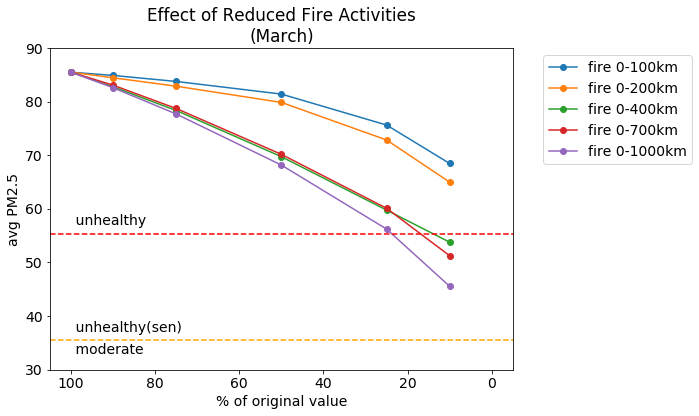

In [87]:
plt.figure(figsize=(10,6))
plt.title("Effect of Reduced Fire Activities\n(March)")
columns_list = [fill(l,20) for l in fea_effect_3m.columns]
plt.plot(fea_effect_mar, marker='o')
plt.legend(columns_list, bbox_to_anchor=(1.05, 1))
plt.xlim(105, -5) 
plt.xlabel('% of original value')
plt.ylabel('avg PM2.5')
plt.ylim([30, 90])

for l, c in inferer.color_zip: 
    plt.axhline(l, color=c, linestyle='dashed')
    
plt.text(100, 33, ' moderate',  horizontalalignment='left')
plt.text(100, 37, ' unhealthy(sen)',  horizontalalignment='left')
plt.text(100, 57, ' unhealthy',  horizontalalignment='left')
plt.tight_layout()
    
plt.savefig(inferer.report_folder + 'effect_of_fire_reduction_mar.png')

# Animation

In [65]:
def show_city(dataset, stepx=800E3, stepy=800E3, color='black'):
    """Load city location and plot the city center on the map
    
    Args:
        dataset object
        stepx: height of the map in meter 
        stepy: width of the map in meter
        color: color of the circle to mark the city center 
        
    Returns 
        p: bokeh figure object 
        city_x: Longitude in mercator
        city_y: Latitude in mercator 
    """ 
    city_x = merc_x(dataset.city_info['Longitude'])
    city_y = merc_y(dataset.city_info['Latitude'])
    
    x_range = [city_x - stepx, city_x + stepx]
    y_range = [city_y-stepy*0.5, city_y+stepy*0.0001]
    
    p = figure(plot_width=500, plot_height=500, toolbar_location=None, title='burning activities', 
            x_range=x_range, y_range=y_range, x_axis_type="mercator", y_axis_type="mercator")
    
    # add map
    p.add_tile(get_provider(Vendors.STAMEN_TERRAIN_RETINA))
    
    # add city center 
    #p.circle(city_x, city_y, color=color, line_color='black',size=5, legend_label=dataset.city_name)
   
    return p, city_x, city_y 

In [90]:
def plot_base_effect(df,  title='avg Dec-Apr', plot_width=250, plot_height=250, y_range=[32, 65], color='grey', alpha=1, line_values=[36,56]):
    """Plot base plot of the average pollution level from filename.
    
    Load the file specified by the filename and plot data in grey color 
    
    Args:
        df: dataframe to plot
        title
        plot_width: width of the plot
        plot_height: height of the plot
        color: color of the plot
        y_range: 
        alpha: transparency level 
        line_values: value for the horizontal color lines to make the pollution limit 
        
    Return bokeh figure object 
    
    """
    p = figure(plot_width=plot_width, plot_height=plot_height,  toolbar_location=None, title=title, y_range=y_range,x_range=[105, 0])
    p.xaxis.axis_label = '% of original value'
    p.yaxis.axis_label = 'PM2.5 level(μg/m²)'
    
    # add horizontal lines
    line = Span(location=line_values[0], dimension='width', line_color='orange', line_dash='dashed')
    p.add_layout(line)
    text = Label(x=100, y=32, text='moderate')
    p.add_layout(text)

    line = Span(location=line_values[1], dimension='width', line_color='red', line_dash='dashed')
    p.add_layout(line)
    p.add_layout(Label(x=100, y=37, text='unhealthy(sen)'))
    p.add_layout(Label(x=100, y=61, text='unhealthy'))
    
    
    #df = pd.read_csv(filename)
    
    for col in df.columns:
        p.circle(df.index, df[col],color=color, alpha=alpha)
        p.line(df.index, df[col],color=color, alpha=alpha)
        
    #p.xaxis.ticker = FixedTicker(ticks=[100, 80, 60, 40, 20, 0, -20])
    
    return p
    

In [95]:
def plot_base_season(head_filename, plot_width=250, plot_height=250, color='grey', alpha=1, line_values=[12,35.5,55.5]):
    """Plot base seasonal pattern pollution level from different head_filename.
    
    Load the file specified by the head_filename+*.csv. Load all the data and plot data in grey color 
    
    Args:
        filename: plot data file 
        plot_width: width of the plot
        plot_height: height of the plot
        color: color of the plot
        y_range: 
        alpha: transparency level 
        line_values: value for the horizontal color lines to make the pollution limit 
        
    Return bokeh figure object 
    
    """ 
    p = figure(plot_width=plot_width, plot_height=plot_height, toolbar_location=None, title='seasonal pattern')    
    p.xaxis.axis_label = 'month'
    p.yaxis.axis_label = 'PM2.5 level(μg/m²)'
    
    # add horizontal lines
    p.add_layout(Span(location=line_values[0], dimension='width', line_color='goldenrod', line_dash='dashed'))
    line = Span(location=line_values[1], dimension='width', line_color='orange', line_dash='dashed')
    p.add_layout(line)
    text = Label(x=0, y=21, text='moderate')
    p.add_layout(text)

    line = Span(location=line_values[2], dimension='width', line_color='red', line_dash='dashed')
    p.add_layout(line)
    p.add_layout(Label(x=0, y=40, text='unhealthy(sen)'))
    p.add_layout(Label(x=0, y=62, text='unhealthy(sen)'))
    
    files = glob(head_filename+'*.csv')
    for file in files:
        df = pd.read_csv(file).set_index('winter_day')
        for col in df.columns:
            p.line(df.index, df[col], color=color, alpha=alpha)
    
    # define xticks label 
    
    p.xaxis.ticker = FixedTicker(ticks=[0, 62, 123, 185, 245, 306])
    xaxis_dict = {0:"Jul", 62:"Sept", 123:'Nov' , 185: "Jan", 245: "Mar", 306:"May" }
    p.xaxis.major_label_overrides = xaxis_dict

    
    return p

In [68]:
def plot_one_effet(radius, color, percent, avg_df, filename, p1, p2, p3):
    """Plot individual effect of each fire zone and percent reduction
    
    """
    label = f'0 - {radius}km'
    
    # plot average lines 
    col = f'fire 0-{radius}km'
    p1.line(avg_df.index, avg_df.loc[:, col],color=color,line_width=3)
    p1.circle(percent, avg_df.loc[percent, col],color=color,line_color='black', size=8)
    text = Label(x=5, y=61, text=label, text_font_size='12pt', text_align='right',  text_color=color_list[0])
    p1.add_layout(text)
    
    # plot seasonal line 
    text = Label(x=0, y=90, text=label, text_font_size='12pt', text_align='left', text_color=color_list[0])
    p2.add_layout(text)
    text = Label(x=0, y=80, text=f'{percent}% fire', text_font_size='12pt', text_align='left', text_color=color_list[0])
    p2.add_layout(text)

    df = pd.read_csv(filename).set_index('winter_day')
    p2.line(df.index, df[str(percent)], color=color, line_width=3)
    
    # addcircle to map plot
    xy = get_circle(city_x, city_y,r=radius*1E3)
    p3.line(xy[0,:],xy[1,:],alpha=1,line_width=2,line_color=color, legend_label=label)
    
    # add city center  
    text = Label(x=city_x, y=city_y, text=f'Chiang Mai', text_font_size='15pt', text_color='black')
    p3.add_layout(text)
    # add city center dot
    p3.circle(city_x, city_y, color='black', line_color='black',size=5)
    

In [69]:
# load inference dataset
inferer = Inferer(city_name='Chiang Mai', pollutant='PM2.5')
dataset = inferer.dataset

data no fire has shape (77747, 14)
raw model performance {'test_r2_score': 0.6971263012454727, 'test_mean_squared_error': 236.87171030783028, 'test_mean_absolute_error': 9.356311166795104}
daily avg training error {'avg_trn_r2_score': 0.9750555507848502, 'avg_trn_mean_squared_error': 16.30387143688307, 'avg_trn_mean_absolute_error': 2.4689413599174954}
daily avg test error {'avg_test_r2_score': 0.7774020193313866, 'avg_test_mean_squared_error': 149.34608153552455, 'avg_test_mean_absolute_error': 7.808431861215025}
max error 15.062821731493033


In [70]:
# calculate the number of hotspots between december and april 
inner = 0
num_fire_df = []

for distance in inferer.zone_list[1:]: 
    fire_hour  = dataset.fire[(dataset.fire['distance']>inner )&(dataset.fire['distance'] <= distance)] 
    fire_hour = fire_hour[['count']].resample('d').count().copy()
    col = [f'{inner}-{distance}km']
    inner = distance
    fire_hour.columns = col 
    fire_hour = fire_hour.rolling(5, min_periods=0).agg('mean').copy().dropna()
    sea_fire, winter_day_dict = season_avg(fire_hour, cols= col, roll=False, agg='mean', offset=182) 
    sea_fire = sea_fire.groupby('winter_day').mean()[col]
    num_fire_df.append(sea_fire)
    
num_fire_df = pd.concat(num_fire_df, axis=1)

# find starting and stoping day range 
for k, v  in winter_day_dict.items():
    if v == '12-01':
        start_day = int(k)
    
    if v == '04-30':
        end_day = int(k)
        
# obtain total number of hotspots
num_hotspots = num_fire_df.loc[start_day:end_day].sum().astype(int)
print(num_hotspots)

0-100km        2208
100-200km     10926
200-400km     44067
400-700km     58992
700-1000km    53905
dtype: int32


In [71]:
# obtain possible hotspots location 
fire_distances = []
for inner, distance in zip(inferer.zone_list, inferer.zone_list[1:]): 
    fire_hour  = dataset.fire[(dataset.fire['distance']>inner )&(dataset.fire['distance'] <= distance)] 
    fire_hour['dayofyear'] = fire_hour.index.dayofyear
    offset = 182
    # add winter day by substratcing the first day of july
    winterday = fire_hour['dayofyear'] - offset
    # get rid of the negative number
    winter_day_max = winterday.max()
    winterday[winterday < 0] = winterday[winterday < 0] + \
        offset + winter_day_max
    fire_hour['dayofyear'] = winterday
    
    fire_hour = fire_hour.sort_values('dayofyear') 
    # select the data between specified range range 
    fire_hour = fire_hour[(fire_hour['dayofyear']>start_day) & (fire_hour['dayofyear']<=end_day)]
    
    # add coordinate in mercator meter (km is too coarse)
    #fire_hour['long_m'] = merc_x(fire_hour['longitude'])
    #fire_hour['lat_m'] = fire_hour['latitude'].apply(merc_y)
    fire_hour = fire_hour.drop_duplicates(['lat_km', 'long_km'])
     
    fire_hour = fire_hour[['lat_km', 'long_km']] 
      
    print(fire_hour.shape)
    
    
    fire_distances.append(fire_hour)

(16887, 2)
(63770, 2)
(233286, 2)
(395132, 2)
(323205, 2)


In [72]:
# select random position of hotspots
frac_list = np.ones(len(num_hotspots))
positions_list = []
for num, df in zip(num_hotspots, fire_distances):
    num_sample = int(num*1)
    positions = df.sample(num_sample)
    positions_list.append(positions)

In [99]:
ani_folder = '../reports/ani_plot/'

In [74]:
zone_list = inferer.zone_list[1:]
rs = [120, 200, 400 , 700 , 1000]
color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']
#red_list = [0, 0.1, 0.25, 0.5, 0.75, 0.9]
dataset = inferer.dataset
avg_df = pd.read_csv(f'{ani_folder}effect_of_fire_reduction_3m.csv').set_index('per')
per_list = avg_df.index.to_list()

In [96]:
title = f'Effect of Reduced Fire Activities on PM2.5 level in {dataset.city_name}'

# plot base plots
p1  = plot_base_effect(df=avg_df, alpha=1)
p2 = plot_base_season(head_filename=f'{ani_folder}effect_of_fire_reduction_3m_')
p3, city_x, city_y = show_city(dataset)


i = 1
j = 4

# pick max radius
r = zone_list[i]
# pick line color
color = color_list[i]
# pick percent reduction 
percent = per_list[j]
# build avg label 
label = f'0 - {r}km'

# plot average lines 
p1.line(avg_df.index, avg_df.iloc[:, i],color=color,line_width=3)
p1.circle(per_list[j], avg_df.iloc[j, i],color=color,size=8)
text = Label(x=5, y=61, text=label, text_font_size='12pt', text_align='right',  text_color=color_list[0])
p1.add_layout(text)


# plot seasonal line 
text = Label(x=0, y=90, text=label, text_font_size='12pt', text_align='left', text_color=color_list[0])
p2.add_layout(text)
text = Label(x=0, y=80, text=f'{percent}% fire', text_font_size='12pt', text_align='left', text_color=color_list[0])
p2.add_layout(text)

df = pd.read_csv(f'{ani_folder}effect_of_fire_reduction_3m_{i}.csv').set_index('winter_day')
p2.line(df.index, df[str(percent)], color=color, line_width=3)

# addcircle 
xy = get_circle(city_x, city_y,r=r*1E3)
p3.line(xy[0,:],xy[1,:],alpha=1,line_width=2,line_color=color, legend_label=label)


# add city center 
p3.circle(city_x, city_y, color='black', line_color='black',size=5, legend_label=dataset.city_name)

# plot hotspot 
positions_list_temp = positions_list
frac = percent/100
total_hotspot = []
for ii, (num, df) in enumerate(zip(num_hotspots, positions_list_temp)):
    if ii <= i:
        num_sample = int(num*frac)
        df = df.sample(num_sample)
    total_hotspot.append(len(df))
    p3.circle(df['long_km']*1000, df['lat_km']*1000, size=0.5, color='red',alpha=0.2 )

total_hotspot = np.sum(total_hotspot)
text = Label(x=city_x, y=city_y, text=f'Chiang Mai', text_font_size='15pt', text_color='black')
p3.add_layout(text)
text = Label(x=city_x+0.8E6, y=city_y-0.85E6, text=f' {total_hotspot} hotspots  ', text_font_size='20pt', text_align='right',  text_color='black', background_fill_color='white')
p3.add_layout(text)

p = column(Div(text=f'<h2>{title}</h2>'), row(column(p1, p2), p3))
show(p)
#export_png(p, filename=f"{ani_folder}PNG/{i}_dec_apr.png")

In [97]:
def plot_hotspots(positions_list_temp, num_hotspots, i, percent, p):
    """Add hotspots on the map base on a select position.
    
    Return new_position_list for the next iterations. This help make the hotspots consistent instead of randoms. 
    
    """
    
    frac = percent/100
    total_hotspot = []
    new_position_list = []
    for ii, (num, df) in enumerate(zip(num_hotspots, positions_list_temp)):
        if ii <= i:
            num_sample = int(num*frac)
            df = df.sample(num_sample).copy()
            
        new_position_list.append(df)
        total_hotspot.append(len(df))
        p.circle(df['long_km']*1000, df['lat_km']*1000, size=1, color='red',alpha=0.3 )
    
    
    # add number of hotspots
    total_hotspot = np.sum(total_hotspot)
    text = Label(x=city_x+0.8E6, y=city_y-0.85E6, text=f' {total_hotspot} hotspots  ', text_font_size='20pt', text_align='right',  text_color='black', background_fill_color='white')
    p.add_layout(text)
    return new_position_list

In [100]:
title = f'Effect of Reduced Fire Activities on PM2.5 level in {dataset.city_name}'

for i in range(len(zone_list)):
    # pick max radius
    radius = zone_list[i]
    # pick line color
    color = color_list[i]
    
    
    positions_list_temp = positions_list
    
    for j in range(len(per_list)): 

        # plot base plots
        p1  = plot_base_effect(df=avg_df, alpha=1)
        p2 = plot_base_season(head_filename=f'{ani_folder}effect_of_fire_reduction_3m_')
        p3, city_x, city_y = show_city(dataset)
        # pick percent reduction 
        percent = per_list[j]
        
        positions_list_temp = plot_hotspots(positions_list_temp, num_hotspots, i, percent, p3)
        plot_one_effet(radius, color, percent, avg_df, filename=f'{ani_folder}effect_of_fire_reduction_3m_{i}.csv', p1=p1, p2=p2, p3=p3)
         
        p = column(Div(text=f'<h2>{title}</h2>'), row(column(p1, p2), p3))
        
        #show(p)
        export_png(p, filename=f"{ani_folder}PNG/{i}_{j}_dec_apr.png")

In [1]:
import imageio

In [102]:
# load all the pollution map fire 
filenames = glob(f'{ani_folder}PNG/*.png')

# create a gif showing pollution level for each month
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave(f'{ani_folder}eff_reduced_fire1.gif', images, duration=0.5)

# Additional Plot

In [45]:
features = inferer.feat_imp['index'][inferer.feat_imp['index'].str.contains('fire')][:5] 
features = features.to_list()
zone_list = inferer.zone_list
feature_list = []
columns_list = []
max_dis = []
red_list = [1.0, 0.9, 0.5, 0.1, 0]

for i in range(1,6):
    fea = features[:i]
    
    feature_list += fea
    columns_list.append(f'fire {zone_list[0]}-{zone_list[i]}km')
    max_dis.append(zone_list[i])
    
    print(feature_list)
    
    fea_effect =  reduc_effect(model=inferer.model, data_samples=inferer.data_samples, sea_error= inferer.sea_error, features=feature_list, q=0.75, red_list=red_list)
    fea_effect.to_csv(dataset.model_folder + f'fea_effect_maxdis{zone_list[i]}.csv')

['fire_0_100']
['fire_0_100']
fire_0_100
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_0_100_lag_5', 'fire_0_100_lag_6', 'fire_0_100_lag_7', 'fire_0_100_lag_8', 'fire_0_100_lag_9', 'fire_0_100_lag_10', 'fire_0_100_lag_11', 'fire_0_100_lag_12', 'fire_0_100_lag_13', 'fire_0_100_lag_14', 'fire_0_100_lag_15', 'fire_0_100_lag_16', 'fire_0_100_lag_17', 'fire_0_100_lag_18', 'fire_0_100_lag_19', 'fire_0_100_lag_20', 'fire_0_100_lag_21', 'fire_0_100_lag_22', 'fire_0_100_lag_23', 'fire_0_100_lag_24', 'fire_0_100_lag_25', 'fire_0_100_lag_26', 'fire_0_100_lag_27', 'fire_0_100_lag_28', 'fire_0_100_lag_29', 'fire_0_100_lag_30', 'fire_0_100_lag_31', 'fire_0_100_lag_32', 'fire_0_100_lag_33', 'fire_0_100_lag_34', 'fire_0_100_lag_35', 'fire_0_100_lag_36', 'fire_0_100_lag_37', 'fire_0_100_lag_38', 'fire_0_100_lag_39', 'fire_0_100_lag_40', 'fire_0_100_lag_41', 'fire_0_100_lag_42']
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_

['fire_0_100', 'fire_100_200']
['fire_0_100', 'fire_0_100', 'fire_100_200']
fire_0_100
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_0_100_lag_5', 'fire_0_100_lag_6', 'fire_0_100_lag_7', 'fire_0_100_lag_8', 'fire_0_100_lag_9', 'fire_0_100_lag_10', 'fire_0_100_lag_11', 'fire_0_100_lag_12', 'fire_0_100_lag_13', 'fire_0_100_lag_14', 'fire_0_100_lag_15', 'fire_0_100_lag_16', 'fire_0_100_lag_17', 'fire_0_100_lag_18', 'fire_0_100_lag_19', 'fire_0_100_lag_20', 'fire_0_100_lag_21', 'fire_0_100_lag_22', 'fire_0_100_lag_23', 'fire_0_100_lag_24', 'fire_0_100_lag_25', 'fire_0_100_lag_26', 'fire_0_100_lag_27', 'fire_0_100_lag_28', 'fire_0_100_lag_29', 'fire_0_100_lag_30', 'fire_0_100_lag_31', 'fire_0_100_lag_32', 'fire_0_100_lag_33', 'fire_0_100_lag_34', 'fire_0_100_lag_35', 'fire_0_100_lag_36', 'fire_0_100_lag_37', 'fire_0_100_lag_38', 'fire_0_100_lag_39', 'fire_0_100_lag_40', 'fire_0_100_lag_41', 'fire_0_100_lag_42']
['fire_0_100', 'fire_0_10

fire_0_100
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_0_100_lag_5', 'fire_0_100_lag_6', 'fire_0_100_lag_7', 'fire_0_100_lag_8', 'fire_0_100_lag_9', 'fire_0_100_lag_10', 'fire_0_100_lag_11', 'fire_0_100_lag_12', 'fire_0_100_lag_13', 'fire_0_100_lag_14', 'fire_0_100_lag_15', 'fire_0_100_lag_16', 'fire_0_100_lag_17', 'fire_0_100_lag_18', 'fire_0_100_lag_19', 'fire_0_100_lag_20', 'fire_0_100_lag_21', 'fire_0_100_lag_22', 'fire_0_100_lag_23', 'fire_0_100_lag_24', 'fire_0_100_lag_25', 'fire_0_100_lag_26', 'fire_0_100_lag_27', 'fire_0_100_lag_28', 'fire_0_100_lag_29', 'fire_0_100_lag_30', 'fire_0_100_lag_31', 'fire_0_100_lag_32', 'fire_0_100_lag_33', 'fire_0_100_lag_34', 'fire_0_100_lag_35', 'fire_0_100_lag_36', 'fire_0_100_lag_37', 'fire_0_100_lag_38', 'fire_0_100_lag_39', 'fire_0_100_lag_40', 'fire_0_100_lag_41', 'fire_0_100_lag_42']
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_

fire_0_100
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_0_100_lag_5', 'fire_0_100_lag_6', 'fire_0_100_lag_7', 'fire_0_100_lag_8', 'fire_0_100_lag_9', 'fire_0_100_lag_10', 'fire_0_100_lag_11', 'fire_0_100_lag_12', 'fire_0_100_lag_13', 'fire_0_100_lag_14', 'fire_0_100_lag_15', 'fire_0_100_lag_16', 'fire_0_100_lag_17', 'fire_0_100_lag_18', 'fire_0_100_lag_19', 'fire_0_100_lag_20', 'fire_0_100_lag_21', 'fire_0_100_lag_22', 'fire_0_100_lag_23', 'fire_0_100_lag_24', 'fire_0_100_lag_25', 'fire_0_100_lag_26', 'fire_0_100_lag_27', 'fire_0_100_lag_28', 'fire_0_100_lag_29', 'fire_0_100_lag_30', 'fire_0_100_lag_31', 'fire_0_100_lag_32', 'fire_0_100_lag_33', 'fire_0_100_lag_34', 'fire_0_100_lag_35', 'fire_0_100_lag_36', 'fire_0_100_lag_37', 'fire_0_100_lag_38', 'fire_0_100_lag_39', 'fire_0_100_lag_40', 'fire_0_100_lag_41', 'fire_0_100_lag_42']
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_

fire_0_100
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_0_100_lag_5', 'fire_0_100_lag_6', 'fire_0_100_lag_7', 'fire_0_100_lag_8', 'fire_0_100_lag_9', 'fire_0_100_lag_10', 'fire_0_100_lag_11', 'fire_0_100_lag_12', 'fire_0_100_lag_13', 'fire_0_100_lag_14', 'fire_0_100_lag_15', 'fire_0_100_lag_16', 'fire_0_100_lag_17', 'fire_0_100_lag_18', 'fire_0_100_lag_19', 'fire_0_100_lag_20', 'fire_0_100_lag_21', 'fire_0_100_lag_22', 'fire_0_100_lag_23', 'fire_0_100_lag_24', 'fire_0_100_lag_25', 'fire_0_100_lag_26', 'fire_0_100_lag_27', 'fire_0_100_lag_28', 'fire_0_100_lag_29', 'fire_0_100_lag_30', 'fire_0_100_lag_31', 'fire_0_100_lag_32', 'fire_0_100_lag_33', 'fire_0_100_lag_34', 'fire_0_100_lag_35', 'fire_0_100_lag_36', 'fire_0_100_lag_37', 'fire_0_100_lag_38', 'fire_0_100_lag_39', 'fire_0_100_lag_40', 'fire_0_100_lag_41', 'fire_0_100_lag_42']
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_

fire_0_100
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_0_100_lag_5', 'fire_0_100_lag_6', 'fire_0_100_lag_7', 'fire_0_100_lag_8', 'fire_0_100_lag_9', 'fire_0_100_lag_10', 'fire_0_100_lag_11', 'fire_0_100_lag_12', 'fire_0_100_lag_13', 'fire_0_100_lag_14', 'fire_0_100_lag_15', 'fire_0_100_lag_16', 'fire_0_100_lag_17', 'fire_0_100_lag_18', 'fire_0_100_lag_19', 'fire_0_100_lag_20', 'fire_0_100_lag_21', 'fire_0_100_lag_22', 'fire_0_100_lag_23', 'fire_0_100_lag_24', 'fire_0_100_lag_25', 'fire_0_100_lag_26', 'fire_0_100_lag_27', 'fire_0_100_lag_28', 'fire_0_100_lag_29', 'fire_0_100_lag_30', 'fire_0_100_lag_31', 'fire_0_100_lag_32', 'fire_0_100_lag_33', 'fire_0_100_lag_34', 'fire_0_100_lag_35', 'fire_0_100_lag_36', 'fire_0_100_lag_37', 'fire_0_100_lag_38', 'fire_0_100_lag_39', 'fire_0_100_lag_40', 'fire_0_100_lag_41', 'fire_0_100_lag_42']
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_

['fire_0_100', 'fire_100_200', 'fire_700_900']
['fire_0_100', 'fire_0_100', 'fire_100_200', 'fire_0_100', 'fire_100_200', 'fire_700_900']
fire_0_100
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_0_100_lag_5', 'fire_0_100_lag_6', 'fire_0_100_lag_7', 'fire_0_100_lag_8', 'fire_0_100_lag_9', 'fire_0_100_lag_10', 'fire_0_100_lag_11', 'fire_0_100_lag_12', 'fire_0_100_lag_13', 'fire_0_100_lag_14', 'fire_0_100_lag_15', 'fire_0_100_lag_16', 'fire_0_100_lag_17', 'fire_0_100_lag_18', 'fire_0_100_lag_19', 'fire_0_100_lag_20', 'fire_0_100_lag_21', 'fire_0_100_lag_22', 'fire_0_100_lag_23', 'fire_0_100_lag_24', 'fire_0_100_lag_25', 'fire_0_100_lag_26', 'fire_0_100_lag_27', 'fire_0_100_lag_28', 'fire_0_100_lag_29', 'fire_0_100_lag_30', 'fire_0_100_lag_31', 'fire_0_100_lag_32', 'fire_0_100_lag_33', 'fire_0_100_lag_34', 'fire_0_100_lag_35', 'fire_0_100_lag_36', 'fire_0_100_lag_37', 'fire_0_100_lag_38', 'fire_0_100_lag_39', 'fire_0_100_lag_40', 'fire

fire_0_100
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_0_100_lag_5', 'fire_0_100_lag_6', 'fire_0_100_lag_7', 'fire_0_100_lag_8', 'fire_0_100_lag_9', 'fire_0_100_lag_10', 'fire_0_100_lag_11', 'fire_0_100_lag_12', 'fire_0_100_lag_13', 'fire_0_100_lag_14', 'fire_0_100_lag_15', 'fire_0_100_lag_16', 'fire_0_100_lag_17', 'fire_0_100_lag_18', 'fire_0_100_lag_19', 'fire_0_100_lag_20', 'fire_0_100_lag_21', 'fire_0_100_lag_22', 'fire_0_100_lag_23', 'fire_0_100_lag_24', 'fire_0_100_lag_25', 'fire_0_100_lag_26', 'fire_0_100_lag_27', 'fire_0_100_lag_28', 'fire_0_100_lag_29', 'fire_0_100_lag_30', 'fire_0_100_lag_31', 'fire_0_100_lag_32', 'fire_0_100_lag_33', 'fire_0_100_lag_34', 'fire_0_100_lag_35', 'fire_0_100_lag_36', 'fire_0_100_lag_37', 'fire_0_100_lag_38', 'fire_0_100_lag_39', 'fire_0_100_lag_40', 'fire_0_100_lag_41', 'fire_0_100_lag_42']
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_

fire_0_100
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_0_100_lag_5', 'fire_0_100_lag_6', 'fire_0_100_lag_7', 'fire_0_100_lag_8', 'fire_0_100_lag_9', 'fire_0_100_lag_10', 'fire_0_100_lag_11', 'fire_0_100_lag_12', 'fire_0_100_lag_13', 'fire_0_100_lag_14', 'fire_0_100_lag_15', 'fire_0_100_lag_16', 'fire_0_100_lag_17', 'fire_0_100_lag_18', 'fire_0_100_lag_19', 'fire_0_100_lag_20', 'fire_0_100_lag_21', 'fire_0_100_lag_22', 'fire_0_100_lag_23', 'fire_0_100_lag_24', 'fire_0_100_lag_25', 'fire_0_100_lag_26', 'fire_0_100_lag_27', 'fire_0_100_lag_28', 'fire_0_100_lag_29', 'fire_0_100_lag_30', 'fire_0_100_lag_31', 'fire_0_100_lag_32', 'fire_0_100_lag_33', 'fire_0_100_lag_34', 'fire_0_100_lag_35', 'fire_0_100_lag_36', 'fire_0_100_lag_37', 'fire_0_100_lag_38', 'fire_0_100_lag_39', 'fire_0_100_lag_40', 'fire_0_100_lag_41', 'fire_0_100_lag_42']
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_

fire_0_100
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_0_100_lag_5', 'fire_0_100_lag_6', 'fire_0_100_lag_7', 'fire_0_100_lag_8', 'fire_0_100_lag_9', 'fire_0_100_lag_10', 'fire_0_100_lag_11', 'fire_0_100_lag_12', 'fire_0_100_lag_13', 'fire_0_100_lag_14', 'fire_0_100_lag_15', 'fire_0_100_lag_16', 'fire_0_100_lag_17', 'fire_0_100_lag_18', 'fire_0_100_lag_19', 'fire_0_100_lag_20', 'fire_0_100_lag_21', 'fire_0_100_lag_22', 'fire_0_100_lag_23', 'fire_0_100_lag_24', 'fire_0_100_lag_25', 'fire_0_100_lag_26', 'fire_0_100_lag_27', 'fire_0_100_lag_28', 'fire_0_100_lag_29', 'fire_0_100_lag_30', 'fire_0_100_lag_31', 'fire_0_100_lag_32', 'fire_0_100_lag_33', 'fire_0_100_lag_34', 'fire_0_100_lag_35', 'fire_0_100_lag_36', 'fire_0_100_lag_37', 'fire_0_100_lag_38', 'fire_0_100_lag_39', 'fire_0_100_lag_40', 'fire_0_100_lag_41', 'fire_0_100_lag_42']
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_

fire_0_100
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_0_100_lag_5', 'fire_0_100_lag_6', 'fire_0_100_lag_7', 'fire_0_100_lag_8', 'fire_0_100_lag_9', 'fire_0_100_lag_10', 'fire_0_100_lag_11', 'fire_0_100_lag_12', 'fire_0_100_lag_13', 'fire_0_100_lag_14', 'fire_0_100_lag_15', 'fire_0_100_lag_16', 'fire_0_100_lag_17', 'fire_0_100_lag_18', 'fire_0_100_lag_19', 'fire_0_100_lag_20', 'fire_0_100_lag_21', 'fire_0_100_lag_22', 'fire_0_100_lag_23', 'fire_0_100_lag_24', 'fire_0_100_lag_25', 'fire_0_100_lag_26', 'fire_0_100_lag_27', 'fire_0_100_lag_28', 'fire_0_100_lag_29', 'fire_0_100_lag_30', 'fire_0_100_lag_31', 'fire_0_100_lag_32', 'fire_0_100_lag_33', 'fire_0_100_lag_34', 'fire_0_100_lag_35', 'fire_0_100_lag_36', 'fire_0_100_lag_37', 'fire_0_100_lag_38', 'fire_0_100_lag_39', 'fire_0_100_lag_40', 'fire_0_100_lag_41', 'fire_0_100_lag_42']
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_

['fire_0_100', 'fire_100_200', 'fire_700_900', 'fire_400_700']
['fire_0_100', 'fire_0_100', 'fire_100_200', 'fire_0_100', 'fire_100_200', 'fire_700_900', 'fire_0_100', 'fire_100_200', 'fire_700_900', 'fire_400_700']
fire_0_100
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_0_100_lag_5', 'fire_0_100_lag_6', 'fire_0_100_lag_7', 'fire_0_100_lag_8', 'fire_0_100_lag_9', 'fire_0_100_lag_10', 'fire_0_100_lag_11', 'fire_0_100_lag_12', 'fire_0_100_lag_13', 'fire_0_100_lag_14', 'fire_0_100_lag_15', 'fire_0_100_lag_16', 'fire_0_100_lag_17', 'fire_0_100_lag_18', 'fire_0_100_lag_19', 'fire_0_100_lag_20', 'fire_0_100_lag_21', 'fire_0_100_lag_22', 'fire_0_100_lag_23', 'fire_0_100_lag_24', 'fire_0_100_lag_25', 'fire_0_100_lag_26', 'fire_0_100_lag_27', 'fire_0_100_lag_28', 'fire_0_100_lag_29', 'fire_0_100_lag_30', 'fire_0_100_lag_31', 'fire_0_100_lag_32', 'fire_0_100_lag_33', 'fire_0_100_lag_34', 'fire_0_100_lag_35', 'fire_0_100_lag_36', 'fire_0_100

fire_0_100
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_0_100_lag_5', 'fire_0_100_lag_6', 'fire_0_100_lag_7', 'fire_0_100_lag_8', 'fire_0_100_lag_9', 'fire_0_100_lag_10', 'fire_0_100_lag_11', 'fire_0_100_lag_12', 'fire_0_100_lag_13', 'fire_0_100_lag_14', 'fire_0_100_lag_15', 'fire_0_100_lag_16', 'fire_0_100_lag_17', 'fire_0_100_lag_18', 'fire_0_100_lag_19', 'fire_0_100_lag_20', 'fire_0_100_lag_21', 'fire_0_100_lag_22', 'fire_0_100_lag_23', 'fire_0_100_lag_24', 'fire_0_100_lag_25', 'fire_0_100_lag_26', 'fire_0_100_lag_27', 'fire_0_100_lag_28', 'fire_0_100_lag_29', 'fire_0_100_lag_30', 'fire_0_100_lag_31', 'fire_0_100_lag_32', 'fire_0_100_lag_33', 'fire_0_100_lag_34', 'fire_0_100_lag_35', 'fire_0_100_lag_36', 'fire_0_100_lag_37', 'fire_0_100_lag_38', 'fire_0_100_lag_39', 'fire_0_100_lag_40', 'fire_0_100_lag_41', 'fire_0_100_lag_42']
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_

fire_0_100
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_0_100_lag_5', 'fire_0_100_lag_6', 'fire_0_100_lag_7', 'fire_0_100_lag_8', 'fire_0_100_lag_9', 'fire_0_100_lag_10', 'fire_0_100_lag_11', 'fire_0_100_lag_12', 'fire_0_100_lag_13', 'fire_0_100_lag_14', 'fire_0_100_lag_15', 'fire_0_100_lag_16', 'fire_0_100_lag_17', 'fire_0_100_lag_18', 'fire_0_100_lag_19', 'fire_0_100_lag_20', 'fire_0_100_lag_21', 'fire_0_100_lag_22', 'fire_0_100_lag_23', 'fire_0_100_lag_24', 'fire_0_100_lag_25', 'fire_0_100_lag_26', 'fire_0_100_lag_27', 'fire_0_100_lag_28', 'fire_0_100_lag_29', 'fire_0_100_lag_30', 'fire_0_100_lag_31', 'fire_0_100_lag_32', 'fire_0_100_lag_33', 'fire_0_100_lag_34', 'fire_0_100_lag_35', 'fire_0_100_lag_36', 'fire_0_100_lag_37', 'fire_0_100_lag_38', 'fire_0_100_lag_39', 'fire_0_100_lag_40', 'fire_0_100_lag_41', 'fire_0_100_lag_42']
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_

fire_0_100
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_0_100_lag_5', 'fire_0_100_lag_6', 'fire_0_100_lag_7', 'fire_0_100_lag_8', 'fire_0_100_lag_9', 'fire_0_100_lag_10', 'fire_0_100_lag_11', 'fire_0_100_lag_12', 'fire_0_100_lag_13', 'fire_0_100_lag_14', 'fire_0_100_lag_15', 'fire_0_100_lag_16', 'fire_0_100_lag_17', 'fire_0_100_lag_18', 'fire_0_100_lag_19', 'fire_0_100_lag_20', 'fire_0_100_lag_21', 'fire_0_100_lag_22', 'fire_0_100_lag_23', 'fire_0_100_lag_24', 'fire_0_100_lag_25', 'fire_0_100_lag_26', 'fire_0_100_lag_27', 'fire_0_100_lag_28', 'fire_0_100_lag_29', 'fire_0_100_lag_30', 'fire_0_100_lag_31', 'fire_0_100_lag_32', 'fire_0_100_lag_33', 'fire_0_100_lag_34', 'fire_0_100_lag_35', 'fire_0_100_lag_36', 'fire_0_100_lag_37', 'fire_0_100_lag_38', 'fire_0_100_lag_39', 'fire_0_100_lag_40', 'fire_0_100_lag_41', 'fire_0_100_lag_42']
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_

fire_0_100
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_0_100_lag_5', 'fire_0_100_lag_6', 'fire_0_100_lag_7', 'fire_0_100_lag_8', 'fire_0_100_lag_9', 'fire_0_100_lag_10', 'fire_0_100_lag_11', 'fire_0_100_lag_12', 'fire_0_100_lag_13', 'fire_0_100_lag_14', 'fire_0_100_lag_15', 'fire_0_100_lag_16', 'fire_0_100_lag_17', 'fire_0_100_lag_18', 'fire_0_100_lag_19', 'fire_0_100_lag_20', 'fire_0_100_lag_21', 'fire_0_100_lag_22', 'fire_0_100_lag_23', 'fire_0_100_lag_24', 'fire_0_100_lag_25', 'fire_0_100_lag_26', 'fire_0_100_lag_27', 'fire_0_100_lag_28', 'fire_0_100_lag_29', 'fire_0_100_lag_30', 'fire_0_100_lag_31', 'fire_0_100_lag_32', 'fire_0_100_lag_33', 'fire_0_100_lag_34', 'fire_0_100_lag_35', 'fire_0_100_lag_36', 'fire_0_100_lag_37', 'fire_0_100_lag_38', 'fire_0_100_lag_39', 'fire_0_100_lag_40', 'fire_0_100_lag_41', 'fire_0_100_lag_42']
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_

['fire_0_100', 'fire_100_200', 'fire_700_900', 'fire_400_700', 'fire_200_400']
['fire_0_100', 'fire_0_100', 'fire_100_200', 'fire_0_100', 'fire_100_200', 'fire_700_900', 'fire_0_100', 'fire_100_200', 'fire_700_900', 'fire_400_700', 'fire_0_100', 'fire_100_200', 'fire_700_900', 'fire_400_700', 'fire_200_400']
fire_0_100
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_0_100_lag_5', 'fire_0_100_lag_6', 'fire_0_100_lag_7', 'fire_0_100_lag_8', 'fire_0_100_lag_9', 'fire_0_100_lag_10', 'fire_0_100_lag_11', 'fire_0_100_lag_12', 'fire_0_100_lag_13', 'fire_0_100_lag_14', 'fire_0_100_lag_15', 'fire_0_100_lag_16', 'fire_0_100_lag_17', 'fire_0_100_lag_18', 'fire_0_100_lag_19', 'fire_0_100_lag_20', 'fire_0_100_lag_21', 'fire_0_100_lag_22', 'fire_0_100_lag_23', 'fire_0_100_lag_24', 'fire_0_100_lag_25', 'fire_0_100_lag_26', 'fire_0_100_lag_27', 'fire_0_100_lag_28', 'fire_0_100_lag_29', 'fire_0_100_lag_30', 'fire_0_100_lag_31', 'fire_0_100_lag_32', '

fire_0_100
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_0_100_lag_5', 'fire_0_100_lag_6', 'fire_0_100_lag_7', 'fire_0_100_lag_8', 'fire_0_100_lag_9', 'fire_0_100_lag_10', 'fire_0_100_lag_11', 'fire_0_100_lag_12', 'fire_0_100_lag_13', 'fire_0_100_lag_14', 'fire_0_100_lag_15', 'fire_0_100_lag_16', 'fire_0_100_lag_17', 'fire_0_100_lag_18', 'fire_0_100_lag_19', 'fire_0_100_lag_20', 'fire_0_100_lag_21', 'fire_0_100_lag_22', 'fire_0_100_lag_23', 'fire_0_100_lag_24', 'fire_0_100_lag_25', 'fire_0_100_lag_26', 'fire_0_100_lag_27', 'fire_0_100_lag_28', 'fire_0_100_lag_29', 'fire_0_100_lag_30', 'fire_0_100_lag_31', 'fire_0_100_lag_32', 'fire_0_100_lag_33', 'fire_0_100_lag_34', 'fire_0_100_lag_35', 'fire_0_100_lag_36', 'fire_0_100_lag_37', 'fire_0_100_lag_38', 'fire_0_100_lag_39', 'fire_0_100_lag_40', 'fire_0_100_lag_41', 'fire_0_100_lag_42']
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_

fire_0_100
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_0_100_lag_5', 'fire_0_100_lag_6', 'fire_0_100_lag_7', 'fire_0_100_lag_8', 'fire_0_100_lag_9', 'fire_0_100_lag_10', 'fire_0_100_lag_11', 'fire_0_100_lag_12', 'fire_0_100_lag_13', 'fire_0_100_lag_14', 'fire_0_100_lag_15', 'fire_0_100_lag_16', 'fire_0_100_lag_17', 'fire_0_100_lag_18', 'fire_0_100_lag_19', 'fire_0_100_lag_20', 'fire_0_100_lag_21', 'fire_0_100_lag_22', 'fire_0_100_lag_23', 'fire_0_100_lag_24', 'fire_0_100_lag_25', 'fire_0_100_lag_26', 'fire_0_100_lag_27', 'fire_0_100_lag_28', 'fire_0_100_lag_29', 'fire_0_100_lag_30', 'fire_0_100_lag_31', 'fire_0_100_lag_32', 'fire_0_100_lag_33', 'fire_0_100_lag_34', 'fire_0_100_lag_35', 'fire_0_100_lag_36', 'fire_0_100_lag_37', 'fire_0_100_lag_38', 'fire_0_100_lag_39', 'fire_0_100_lag_40', 'fire_0_100_lag_41', 'fire_0_100_lag_42']
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_

fire_0_100
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_0_100_lag_5', 'fire_0_100_lag_6', 'fire_0_100_lag_7', 'fire_0_100_lag_8', 'fire_0_100_lag_9', 'fire_0_100_lag_10', 'fire_0_100_lag_11', 'fire_0_100_lag_12', 'fire_0_100_lag_13', 'fire_0_100_lag_14', 'fire_0_100_lag_15', 'fire_0_100_lag_16', 'fire_0_100_lag_17', 'fire_0_100_lag_18', 'fire_0_100_lag_19', 'fire_0_100_lag_20', 'fire_0_100_lag_21', 'fire_0_100_lag_22', 'fire_0_100_lag_23', 'fire_0_100_lag_24', 'fire_0_100_lag_25', 'fire_0_100_lag_26', 'fire_0_100_lag_27', 'fire_0_100_lag_28', 'fire_0_100_lag_29', 'fire_0_100_lag_30', 'fire_0_100_lag_31', 'fire_0_100_lag_32', 'fire_0_100_lag_33', 'fire_0_100_lag_34', 'fire_0_100_lag_35', 'fire_0_100_lag_36', 'fire_0_100_lag_37', 'fire_0_100_lag_38', 'fire_0_100_lag_39', 'fire_0_100_lag_40', 'fire_0_100_lag_41', 'fire_0_100_lag_42']
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_

fire_0_100
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_0_100_lag_5', 'fire_0_100_lag_6', 'fire_0_100_lag_7', 'fire_0_100_lag_8', 'fire_0_100_lag_9', 'fire_0_100_lag_10', 'fire_0_100_lag_11', 'fire_0_100_lag_12', 'fire_0_100_lag_13', 'fire_0_100_lag_14', 'fire_0_100_lag_15', 'fire_0_100_lag_16', 'fire_0_100_lag_17', 'fire_0_100_lag_18', 'fire_0_100_lag_19', 'fire_0_100_lag_20', 'fire_0_100_lag_21', 'fire_0_100_lag_22', 'fire_0_100_lag_23', 'fire_0_100_lag_24', 'fire_0_100_lag_25', 'fire_0_100_lag_26', 'fire_0_100_lag_27', 'fire_0_100_lag_28', 'fire_0_100_lag_29', 'fire_0_100_lag_30', 'fire_0_100_lag_31', 'fire_0_100_lag_32', 'fire_0_100_lag_33', 'fire_0_100_lag_34', 'fire_0_100_lag_35', 'fire_0_100_lag_36', 'fire_0_100_lag_37', 'fire_0_100_lag_38', 'fire_0_100_lag_39', 'fire_0_100_lag_40', 'fire_0_100_lag_41', 'fire_0_100_lag_42']
['fire_0_100', 'fire_0_100_lag_1', 'fire_0_100_lag_2', 'fire_0_100_lag_3', 'fire_0_100_lag_4', 'fire_